# Modulos

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Pandas: manipulación y análisis de datos en estructuras tipo DataFrame

# NumPy: operaciones matemáticas y manejo eficiente de arreglos numéricos

# Matplotlib: visualización de datos mediante gráficos estáticos
import matplotlib.pyplot as plt

# Seaborn: visualización estadística avanzada basada en Matplotlib

# Scikit-learn: herramientas para machine learning y análisis predictivo

# SciPy: funciones matemáticas y estadísticas avanzadas
import scipy.stats as stats

# Rutas y Datafarmes

In [156]:
R_bd = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #7\ACTIVIDAD 14\Presatciones economicas\Limpia BASE UNICA MATERNIDAD-PATERNIDAD CONSOLIDADO.xlsx"
R_Salida = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #7\ACTIVIDAD 14\Presatciones economicas\Licencias Maternidad"

In [157]:
df_maternidad = pd.read_excel(
    R_bd,
    sheet_name="BASE MATERNIDAD 2023,2024,2025",
    header=0
)
df_maternidad.columns

Index([             'CONSECUTIVO INTERNO',                              'AÑO',
         'MES DE RADICADO LA INCAPACIDAD',               'Numero Consecutivo',
                     'Modo de Radicacion',         'Tipodedocumentoempelador',
         'Numerodedocumentosdelempelador',                'NOMBRE DE EMPRESA',
                     'CORREO ELECTRÓNICO',                      'SERIAL BDUA',
                        'TP_DIC_AFILIADO',                   'N_DOC_AFILIADO',
                   'NOMBRE DEL COTIZANTE',                 'FECHA NACIMIENTO',
                                   'SEXO',                'TIPO DE COTIZANTE',
                       'CODIGO MUNICIPIO',               'TP_AFILIADO_ACTUAL',
       'IDENTIFICACION DE LA INCAPACIDAD',            'diagnostico principal',
                       'FECHA  DE INICIO',                     'FECHA  FINAL',
                                'SALARIO',                  'FECHA DE RADICA',
                  'Estado de la licencia',          

In [158]:
df_maternidad.dtypes

CONSECUTIVO INTERNO                int64
AÑO                                int64
MES DE RADICADO LA INCAPACIDAD    object
Numero Consecutivo                object
Modo de Radicacion                object
                                   ...  
ID                                object
NIT                                int64
ID2                               object
DIAS_RECONOCIDOS_ADRES            object
VALOR_PAGADO_ADRES                object
Length: 68, dtype: object

# 1. 📘 Introducción y Propósito del Análisis

Este notebook tiene como propósito realizar un análisis exploratorio de las **licencias de maternidad** registradas por Capresoca EPS durante los años **2023, 2024 y 2025**, con el fin de generar insumos técnicos para la construcción de informes ejecutivos, seguimiento institucional y evaluación del impacto económico.

La información analizada proviene del dataframe `df_maternidad`, el cual contiene datos administrativos, económicos y clínicos relacionados con las licencias de maternidad radicadas y pagadas por ADRES. Todas las columnas están inicialmente en formato de texto (string) y serán procesadas para su análisis.

## Normatividad Aplicable

El análisis se desarrolla bajo el marco normativo vigente que regula el reconocimiento y pago de licencias de maternidad en el Sistema General de Seguridad Social en Salud, destacando:

- **Decreto 2126 de 2023**: Define los parámetros para el reconocimiento de prestaciones económicas por parte del SGSS.
- **Decreto 1427 de 2022**: Reglamenta el procedimiento para el reconocimiento y pago de licencias de maternidad y otras prestaciones económicas.
- **Decreto Ley 19 de 2012 – Artículo 142**: Establece la racionalización de trámites, facilitando el acceso a beneficios como licencias.

## Objetivos Técnicos del Análisis

- **Cuantificar** el impacto económico total y promedio de las licencias de maternidad pagadas por ADRES.
- **Analizar** la distribución temporal de los casos (por mes y año).
- **Detectar** patrones de recurrencia por afiliado, empresa o diagnóstico.
- **Identificar** posibles inconsistencias o irregularidades que puedan requerir auditoría o seguimiento.
- **Generar** visualizaciones y tablas resumen que sirvan como base para la elaboración posterior de informes ejecutivos y presentaciones institucionales.

> ⚠️ Este análisis **no incluye incapacidades médicas generales ni licencias de otro tipo**, las cuales se abordan en notebooks separados.

# 2. 📊 Análisis Descriptivo General

Esta sección tiene como propósito explorar la estructura general de los datos, identificar la distribución básica de las licencias de maternidad y preparar el terreno para análisis más profundos en secciones posteriores. El objetivo es obtener una visión clara del volumen, temporalidad y características generales de las licencias.


## 🔍 2.1: Validación y limpieza inicial de datos
* **Objetivo:**
Detectar valores nulos o vacíos.

Corregir errores comunes en el formato (fechas, numéricos).

Preparar columnas clave (FECHA DE NACIMIENTO, FECHA DE INICIO, FECHA FINAL, FECHA DE RADICA, FECHA DE NOTIFICACION DEL PAGO, SALARIO, VALOR PAGADO POR ADRES) para análisis cuantitativo.

In [159]:
# --- 1. Renombrar columnas: quitar espacios y convertir a mayúsculas
df_maternidad.columns = df_maternidad.columns.str.strip().str.replace(' ', '_').str.upper()
df_maternidad.dtypes
# Crear una tabla con dos columnas: columnas_Dataframe y Tipo_Datos
tabla_tipos = (
    df_maternidad.dtypes
    .reset_index()
    .rename(columns={"index": "columnas_Dataframe", 0: "Tipo_Datos"})
)
tabla_tipos["Tipo_Datos"] = tabla_tipos["Tipo_Datos"].astype(str)
tabla_tipos

,columnas_Dataframe,Tipo_Datos
0,CONSECUTIVO_INTERNO,int64
1,AÑO,int64
2,MES_DE_RADICADO_LA_INCAPACIDAD,object
3,NUMERO_CONSECUTIVO,object
4,MODO_DE_RADICACION,object
...,...,...
63,ID,object
64,NIT,int64
65,ID2,object
66,DIAS_RECONOCIDOS_ADRES,object


In [160]:
# Convertir la columna "DIAS_RECONOCIDOS_ADRES" a tipo int64 de forma segura
df_maternidad["DIAS_RECONOCIDOS_ADRES"] = pd.to_numeric(df_maternidad["DIAS_RECONOCIDOS_ADRES"], errors="coerce").astype("Int64")

In [161]:
# --- 2. Convertir columnas de fecha a datetime
columnas_fecha = [
    'FECHA_NACIMIENTO',
    'FECHA__DE_INICIO',
    'FECHA__FINAL',
    'FECHA_DE_RADICA',
    'FECHA_DE_NOTIFICACION_DEL_PAGO'
]

for col in columnas_fecha:
    if df_maternidad[col].dtype == 'object':
        df_maternidad[col] = (
            df_maternidad[col]
            .str.strip()
            .replace('01/01/1900', pd.NA)
        )

    df_maternidad[col] = pd.to_datetime(
        df_maternidad[col],
        errors='coerce',
        dayfirst=True  # más seguro para Colombia
    )

In [162]:
# --- 3. Convertir columnas numéricas de texto a float
def limpiar_valor_monetario_seguro(serie):
    """
    Limpia y convierte una serie de salarios o valores monetarios a float,
    detectando si ya viene en formato numérico o como texto con puntos/separadores.
    """
    if serie.dtype == 'object':
        # Limpiar texto: eliminar puntos de miles, cambiar coma decimal
        return pd.to_numeric(
            serie.str.replace('.', '', regex=False).str.replace(',', '.', regex=False),
            errors='coerce'
        )
    else:
        # Ya es numérico, se devuelve tal cual o como float
        return pd.to_numeric(serie, errors='coerce')


df_maternidad['SALARIO'] = limpiar_valor_monetario_seguro(df_maternidad['SALARIO'])

In [163]:
# --- 4. Resumen de valores nulos y conversiones
resumen_nulos = df_maternidad[[
    'FECHA_NACIMIENTO',
    'FECHA_DE_RADICA',
    'SALARIO',
    'VALOR_PAGADO'
]].isnull().sum().to_frame(name='NULOS')

resumen_nulos['TOTAL_REGISTROS'] = len(df_maternidad)
resumen_nulos['%_NULOS'] = (resumen_nulos['NULOS'] / len(df_maternidad) * 100).round(2)

In [164]:
# --- 5. Mostrar resultado
print("\nResumen de valores nulos y conversiones:\n")
print(resumen_nulos)


Resumen de valores nulos y conversiones:

                  NULOS  TOTAL_REGISTROS  %_NULOS
FECHA_NACIMIENTO      0              638      0.0
FECHA_DE_RADICA       0              638      0.0
SALARIO               0              638      0.0
VALOR_PAGADO          0              638      0.0


## 🔍2.2 – Distribución general por año y estado
* **Objetivo:**

¿Cómo se distribuyen las licencias por año (FECHA_DE_RADICA.dt.year)?

¿Cuántas están en estado PAGADA, RESERVA, NEGADA?

¿Cuánto dinero representa por año o por estado?

1. Agregar columna de AÑO

In [165]:
df_maternidad['AÑO_RADICACION'] = df_maternidad['FECHA_DE_RADICA'].dt.year

2. Conteo por año y estado

In [166]:
conteo_estado_anual = df_maternidad.groupby(['AÑO_RADICACION', 'ESTADO_DE_LA_LICENCIA']).size().unstack(fill_value=0)
print("Distribución de licencias por año y estado:")
conteo_estado_anual

Distribución de licencias por año y estado:


ESTADO_DE_LA_LICENCIA,NEGADO,PAGADA,RESERVA
AÑO_RADICACION,,,
2023,36,241,0
2024,22,255,0
2025,4,48,32


3. Total de licencias PAGADAS por año

In [167]:
pagadas_anual = df_maternidad[df_maternidad['ESTADO_DE_LA_LICENCIA'] == 'PAGADA']
conteo_pagadas = pagadas_anual['AÑO_RADICACION'].value_counts().sort_index()
print("Total de licencias PAGADAS por año:")
conteo_pagadas

Total de licencias PAGADAS por año:


AÑO_RADICACION
2023    241
2024    255
2025     48
Name: count, dtype: int64

4. Valor total pagado por año (solo PAGADAS)

In [168]:
valor_pagado_anual = pagadas_anual.groupby('AÑO_RADICACION')['VALOR_PAGADO'].sum().sort_index()
print("Valor total pagado por año (COP):")
valor_pagado_anual

Valor total pagado por año (COP):


AÑO_RADICACION
2023     964252310
2024    1132806038
2025     207666221
Name: VALOR_PAGADO, dtype: int64

5. Valor promedio pagado por licencia por año

In [169]:
valor_promedio_anual = (valor_pagado_anual / conteo_pagadas).round(0)
print("Valor promedio pagado por licencia (COP):")
valor_promedio_anual

Valor promedio pagado por licencia (COP):


AÑO_RADICACION
2023    4001047.0
2024    4442377.0
2025    4326380.0
dtype: float64

6. Variación anual en número de licencias pagadas

In [170]:
variacion_pagadas = conteo_pagadas.pct_change().round(3) * 100
print("Variación porcentual de licencias pagadas por año (%):")
variacion_pagadas

Variación porcentual de licencias pagadas por año (%):


AÑO_RADICACION
2023     NaN
2024     5.8
2025   -81.2
Name: count, dtype: float64

7. Variación en valor pagado total

In [171]:
variacion_valor = valor_pagado_anual.pct_change().round(3) * 100
print("Variación en valor total pagado por año (%):")
variacion_valor

Variación en valor total pagado por año (%):


AÑO_RADICACION
2023     NaN
2024    17.5
2025   -81.7
Name: VALOR_PAGADO, dtype: float64

## 2.3 Graficas

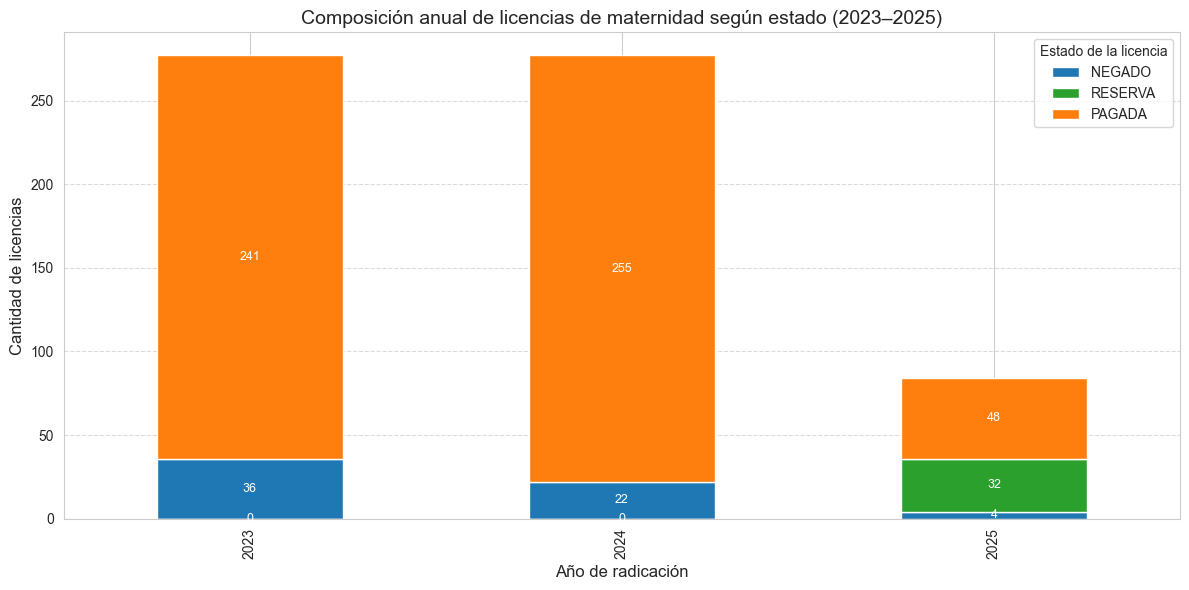

In [172]:
# --- Ordenar columnas por lógica visual: NEGADO (base), RESERVA (medio), PAGADA (arriba)
orden_estados = ['NEGADO', 'RESERVA', 'PAGADA']
conteo_ordenado = conteo_estado_anual[orden_estados]

# --- Crear figura
fig, ax = plt.subplots(figsize=(12, 6))

# --- Colores personalizados (puedes ajustarlos si Capresoca maneja paleta institucional)
colores = ['#1f77b4', '#2ca02c', '#ff7f0e']  # Azul, Verde, Naranja

# --- Gráfico de barras apiladas
conteo_ordenado.plot(kind='bar', stacked=True, color=colores, ax=ax)

# --- Títulos y ejes
ax.set_title('Composición anual de licencias de maternidad según estado (2023–2025)', fontsize=14)
ax.set_ylabel('Cantidad de licencias', fontsize=12)
ax.set_xlabel('Año de radicación', fontsize=12)
ax.legend(title='Estado de la licencia')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# --- Añadir etiquetas numéricas sobre cada barra apilada
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()

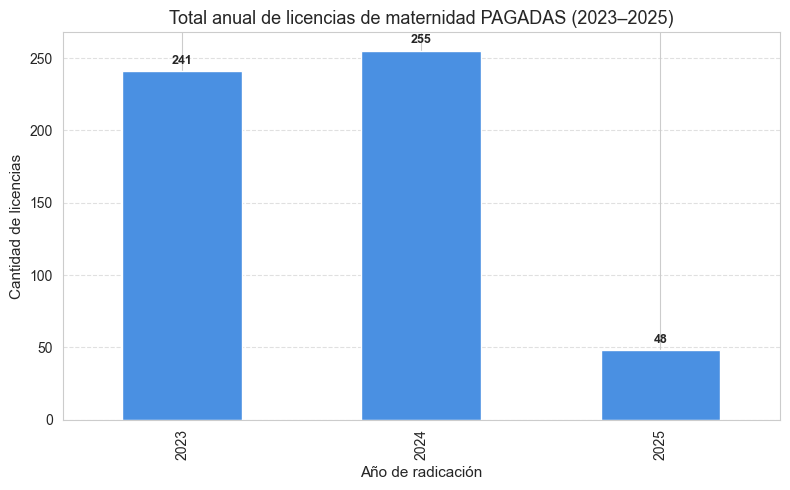

In [173]:
# --- 2. Total de licencias PAGADAS por año (conteo_pagadas)
fig, ax = plt.subplots(figsize=(8, 5))

# --- Gráfico
conteo_pagadas.plot(kind='bar', color='#4a90e2', ax=ax)  # Azul profesional

# --- Estética y títulos
ax.set_title('Total anual de licencias de maternidad PAGADAS (2023–2025)', fontsize=13)
ax.set_ylabel('Cantidad de licencias', fontsize=11)
ax.set_xlabel('Año de radicación', fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# --- Etiquetas sobre las barras
for i, valor in enumerate(conteo_pagadas):
    ax.text(i, valor + 3, str(valor), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

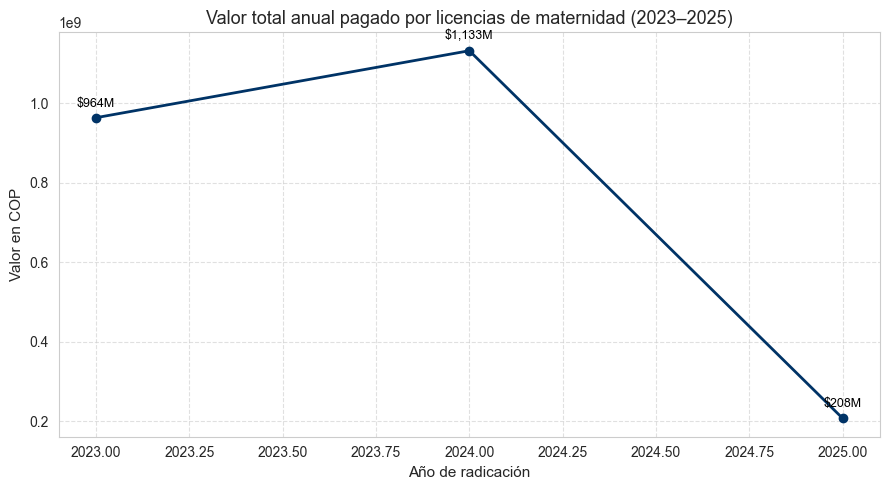

In [174]:
fig, ax = plt.subplots(figsize=(9, 5))

# Gráfico con línea
valor_pagado_anual.plot(kind='line', marker='o', markersize=6, linewidth=2, color='#003366', ax=ax)

# Títulos
ax.set_title('Valor total anual pagado por licencias de maternidad (2023–2025)', fontsize=13)
ax.set_ylabel('Valor en COP', fontsize=11)
ax.set_xlabel('Año de radicación', fontsize=11)
ax.grid(True, linestyle='--', alpha=0.6)

# Mostrar etiquetas en millones (M COP)
for x, y in valor_pagado_anual.items():
    etiqueta = f"${y/1e6:,.0f}M"
    ax.annotate(etiqueta, (x, y), textcoords="offset points", xytext=(0,8), ha='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

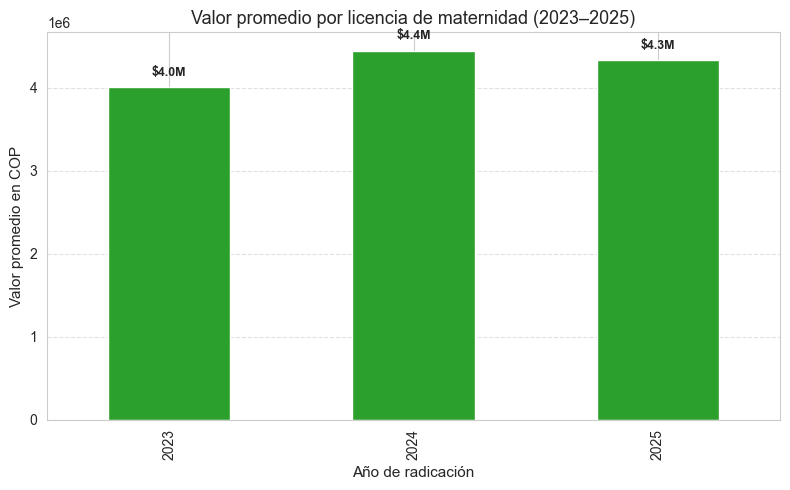

In [175]:
fig, ax = plt.subplots(figsize=(8, 5))

# --- Gráfico de barras
valor_promedio_anual.plot(kind='bar', color='#2ca02c', ax=ax)  # Verde institucional

# --- Títulos y etiquetas
ax.set_title('Valor promedio por licencia de maternidad (2023–2025)', fontsize=13)
ax.set_ylabel('Valor promedio en COP', fontsize=11)
ax.set_xlabel('Año de radicación', fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# --- Mostrar etiquetas con valores en millones de COP
for i, valor in enumerate(valor_promedio_anual):
    ax.text(i, valor + 1e5, f"${valor/1e6:,.1f}M", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

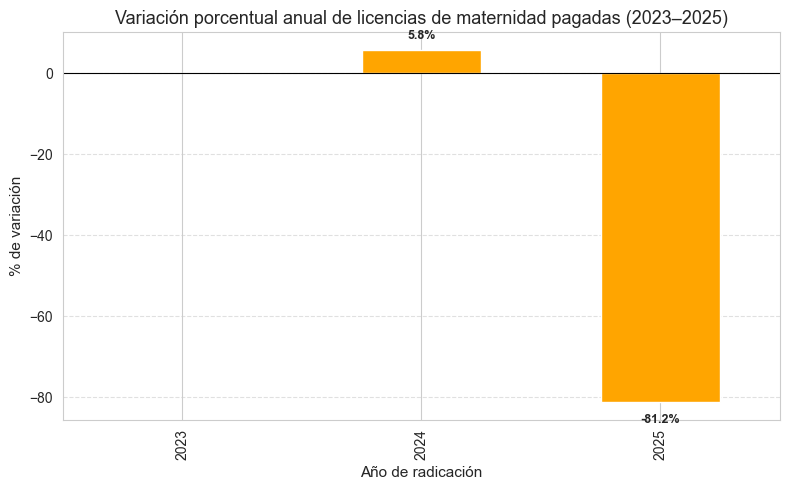

In [176]:
fig, ax = plt.subplots(figsize=(8, 5))

# --- Gráfico de barras
variacion_pagadas.plot(kind='bar', color='#FFA500', ax=ax)  # Naranja institucional

# --- Título y ejes
ax.set_title('Variación porcentual anual de licencias de maternidad pagadas (2023–2025)', fontsize=13)
ax.set_ylabel('% de variación', fontsize=11)
ax.set_xlabel('Año de radicación', fontsize=11)

# --- Línea base en 0
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# --- Etiquetas encima de las barras
for i, valor in enumerate(variacion_pagadas):
    ax.text(i, valor + (2 if valor > 0 else -6), f'{valor:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

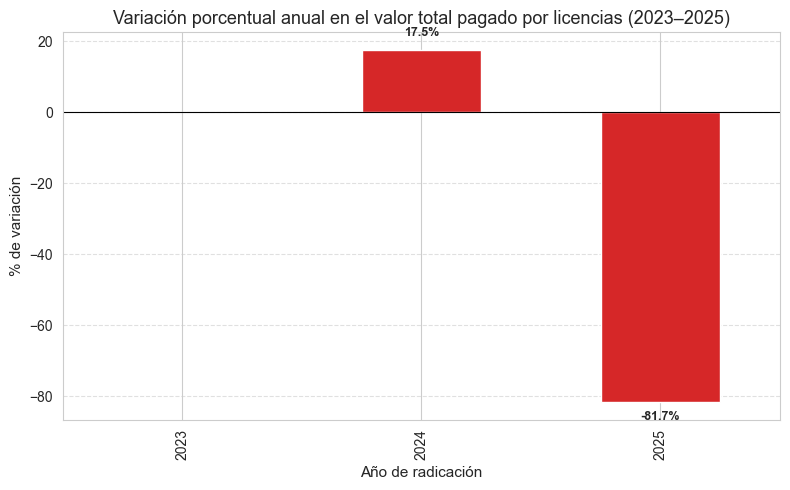

In [177]:
fig, ax = plt.subplots(figsize=(8, 5))

# --- Gráfico de barras
variacion_valor.plot(kind='bar', color='#d62728', ax=ax)  # Rojo institucional

# --- Títulos y ejes
ax.set_title('Variación porcentual anual en el valor total pagado por licencias (2023–2025)', fontsize=13)
ax.set_ylabel('% de variación', fontsize=11)
ax.set_xlabel('Año de radicación', fontsize=11)

# --- Línea base y rejilla
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# --- Etiquetas sobre las barras
for i, valor in enumerate(variacion_valor):
    desplazamiento = 3 if valor > 0 else -6
    ax.text(i, valor + desplazamiento, f'{valor:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## 🧠 2.4 – Hallazgos

A partir del análisis exploratorio de las licencias de maternidad reportadas entre **2023 y 2025**, se destacan los siguientes hallazgos clave:

---

### 📌 1. Reducción aparente en licencias pagadas en 2025 (⚠️ interpretación condicionada)

- En **2023** se registraron **241** licencias pagadas.  
- En **2024** hubo un ligero aumento, con **255** licencias (**+5.8%**).  
- En **2025**, se reportan **48 licencias pagadas**, lo que en comparación directa sugiere una reducción del **81.2%**.

> ⚠️ **Advertencia**: esta disminución no debe interpretarse como una caída real, ya que el corte de datos para 2025 es **solo hasta mayo**, mientras que los otros años cubren el período completo. Se espera un aumento progresivo conforme avance el año.

---

### 📌 2. Composición del estado de las licencias

- En **2023** y **2024**, la mayoría de las licencias están en estado **PAGADA**.  
- En **2025**, hay un incremento en licencias **RESERVA** (32), representando una proporción significativa.  
- Las licencias **NEGADAS** han disminuido de **36** en 2023 a solo **4** en 2025.

> 💡 *Esto podría reflejar mejoras en la documentación o en la gestión previa a la radicación.*

---

### 📌 3. Valor total pagado por año

- **$964M COP** en **2023**.  
- **$1.133M COP** en **2024** (**+17.5%**).  
- **$208M COP** en **2025** (**–81.7%**).

> ⚠️ *El bajo valor en 2025 se debe al corte parcial del año. La variación negativa debe entenderse como efecto de la temporalidad, no de una reducción estructural.*

---

### 📌 4. Valor promedio por licencia se mantiene estable

- **$4.0M COP** en 2023.  
- **$4.4M COP** en 2024.  
- **$4.3M COP** en 2025.

> 💡 *Este indicador sugiere que no ha habido cambios bruscos en el monto individual de las licencias, lo cual es esperable si los parámetros de liquidación (salario base y tiempo) se han mantenido.*

---

### 📌 5. Limitaciones por corte de información

- El análisis para 2025 debe ser considerado **provisional**.  
- Muchas licencias de 2025 se encuentran **en trámite**, **en reserva** o **a la espera de pago**.  
- Es recomendable actualizar los hallazgos al cierre del segundo semestre.

---



# 💰 3. Impacto económico anual y mensual
* **Objetivo:** Evaluar el valor pagado por ADRES y su comportamiento en el tiempo.
Análisis sugerido:
    * Valor total anual y mensual.
    * Valor promedio por licencia y por empresa.
    * Comparación entre valor radicado y valor pagado (si hay campos disponibles).
    * Ranking de empresas con mayor impacto económico.

## 📆 3.1 – Distribución mensual del valor pagado por año
- Objetivo: Visualizar el flujo económico mes a mes, por cada año.
- KPI: Total mensual pagado en licencias.
- Output: Gráfico de barras agrupadas por mes y año.

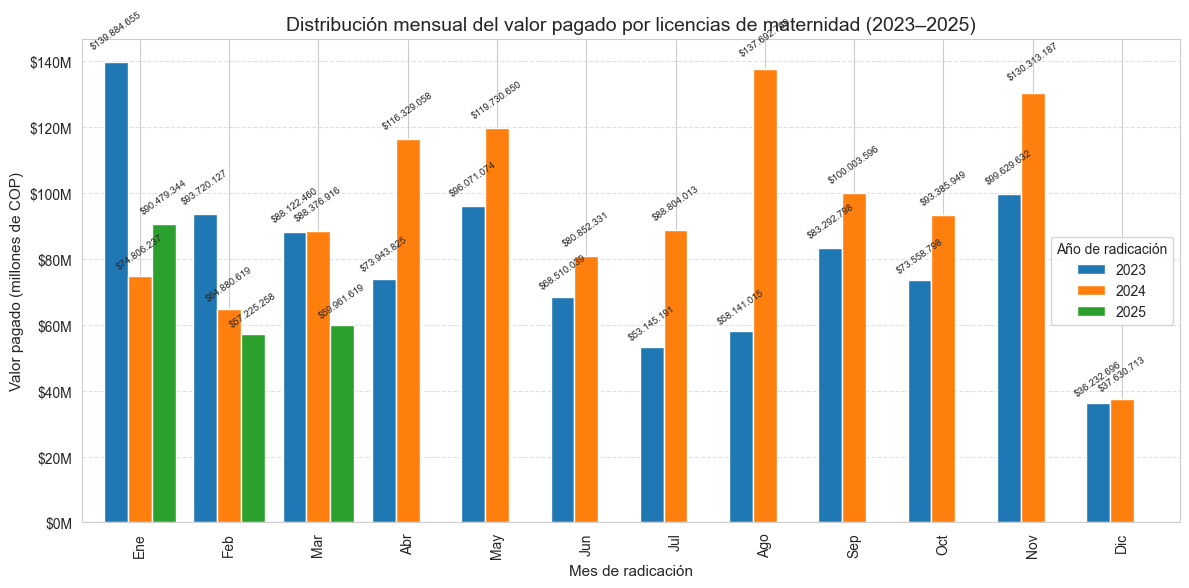

In [178]:
# --- Filtrar solo registros PAGADOS
pagadas = df_maternidad[df_maternidad["ESTADO_DE_LA_LICENCIA"] == "PAGADA"].copy()

# --- Crear columna de MES (nombre) y AÑO
pagadas["MES_RADICACION"] = pagadas["FECHA_DE_RADICA"].dt.month
pagadas["AÑO_RADICACION"] = pagadas["FECHA_DE_RADICA"].dt.year

# --- Asegurar que VALOR_PAGADO es numérico
pagadas["VALOR_PAGADO"] = pd.to_numeric(pagadas["VALOR_PAGADO"], errors='coerce')

# --- Agrupar por año y mes
valor_mensual = (
    pagadas
    .groupby(["AÑO_RADICACION", "MES_RADICACION"])["VALOR_PAGADO"]
    .sum()
    .unstack(level=0)
    .fillna(0)
)

# --- Ordenar los meses por número y asignar nombres
meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
valor_mensual.index = [meses_nombres[m - 1] for m in valor_mensual.index]

# --- Gráfico
fig, ax = plt.subplots(figsize=(12, 6))
valor_mensual.plot(kind="bar", ax=ax, width=0.8)  # Espacio entre barras mejorado

# --- Personalización
ax.set_title("Distribución mensual del valor pagado por licencias de maternidad (2023–2025)", fontsize=14)
ax.set_ylabel("Valor pagado (millones de COP)", fontsize=11)
ax.set_xlabel("Mes de radicación", fontsize=11)
ax.legend(title="Año de radicación")
ax.grid(axis='y', linestyle='--', alpha=0.6)

# --- Etiquetas del eje Y: formato $XM
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${int(x/1e6):,}M".replace(",", ".")))

# --- Etiquetas encima de cada barra, con desplazamiento
for container in ax.containers:
    for bar in container:
        valor = bar.get_height()
        if valor > 0:
            # Evita que los valores queden encima de las barras más altas
            offset = 8 if valor > 120_000_000 else 6 if valor > 80_000_000 else 4
            ax.annotate(
                f"${int(valor):,}".replace(",", "."),
                xy=(bar.get_x() + bar.get_width() / 2, valor),
                xytext=(0, offset),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=7,
                rotation=35  # ligera inclinación evita superposición
            )

plt.tight_layout()
plt.show()

In [179]:
# --- Crear copia base ---
valor_mensual_tabla = valor_mensual.copy()

# --- Reindexar con todos los meses del año en orden ---
meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
valor_mensual_tabla = valor_mensual_tabla.reindex(meses_nombres)

# --- Agregar fila de totales anuales ---
valor_mensual_tabla.loc["Total Anual"] = valor_mensual_tabla.sum()

# --- Resetear índice para tener columna "Mes" ---
valor_mensual_tabla.reset_index(inplace=True)
valor_mensual_tabla.rename(columns={'index': 'Mes'}, inplace=True)  # opcional si no se llama 'Mes'

# --- Aplicar formato COP ---
def formato_pesos(x):
    return f"${int(x):,}".replace(",", ".")

# Formatear solo valores numéricos
valor_mensual_tabla_formateada = valor_mensual_tabla.copy()
for col in valor_mensual_tabla_formateada.columns[1:]:
    valor_mensual_tabla_formateada[col] = valor_mensual_tabla_formateada[col].apply(
        lambda x: formato_pesos(x) if x > 0 else "$0"
    )

# --- Mostrar tabla final ---
from IPython.display import display
print("📋 **Distribución mensual del valor pagado por licencias de maternidad (COP):**")
display(valor_mensual_tabla_formateada)

📋 **Distribución mensual del valor pagado por licencias de maternidad (COP):**


AÑO_RADICACION,Mes,2023,2024,2025
0,Ene,$139.884.655,$74.806.237,$90.479.344
1,Feb,$93.720.127,$64.880.619,$57.225.258
2,Mar,$88.122.460,$88.376.916,$59.961.619
3,Abr,$73.943.825,$116.329.058,$0
4,May,$96.071.074,$119.730.650,$0
5,Jun,$68.510.039,$80.852.331,$0
6,Jul,$53.145.191,$88.804.013,$0
7,Ago,$58.141.015,$137.692.769,$0
8,Sep,$83.292.798,$100.003.596,$0
9,Oct,$73.558.798,$93.385.949,$0


## 📈 3.2 – Tendencia mensual consolidada
Esta subsección nos permitirá identificar si existe una estacionalidad en el comportamiento de pagos por licencias de maternidad, independientemente del año, a través de un consolidado mensual.

✅ Objetivo:
Analizar la distribución del valor pagado total por mes, sumando los años 2023, 2024 y 2025, para observar qué meses concentran más recursos.

🧠 Enfoque técnico:
Vamos a reutilizar el valor_mensual generado previamente, que contiene los valores por mes y año, y sumar por filas.

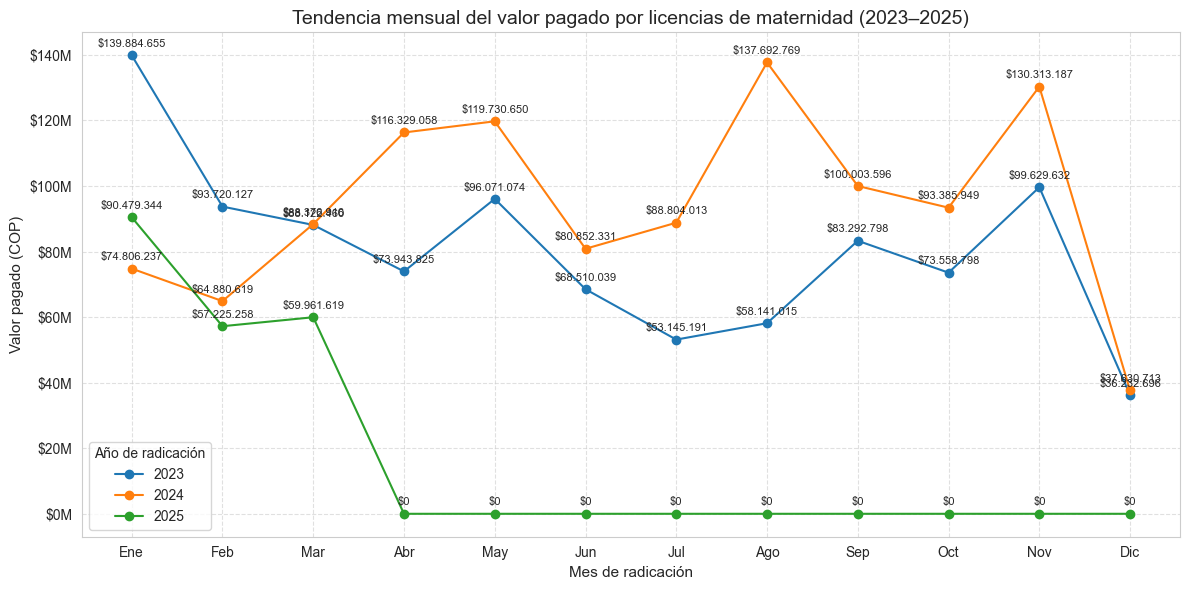

In [180]:
# --- Asegurar que las filas están ordenadas por mes ---
orden_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
               'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
valor_mensual = valor_mensual.reindex(orden_meses)

# --- Gráfico de líneas por año completo (mostrando huecos en 2025) ---
fig, ax = plt.subplots(figsize=(12, 6))
for año in valor_mensual.columns:
    ax.plot(valor_mensual.index, valor_mensual[año], marker='o', label=str(año))

# --- Personalización del gráfico ---
ax.set_title("Tendencia mensual del valor pagado por licencias de maternidad (2023–2025)", fontsize=14)
ax.set_xlabel("Mes de radicación", fontsize=11)
ax.set_ylabel("Valor pagado (COP)", fontsize=11)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(title="Año de radicación")

# --- Formato eje Y en millones de pesos ---
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${int(x/1e6):,}M".replace(",", ".")))

# --- Etiquetas en cada punto (solo donde hay datos) ---
for año in valor_mensual.columns:
    for i, valor in enumerate(valor_mensual[año]):
        if pd.notnull(valor):
            ax.annotate(
                f"${int(valor):,}".replace(",", "."),
                xy=(valor_mensual.index[i], valor),
                xytext=(0, 6),
                textcoords="offset points",
                ha="center",
                fontsize=8
            )

plt.tight_layout()
plt.show()

## 📊 3.3 – Desviaciones mensuales por año
📌 Objetivo:
Detectar meses atípicos donde los pagos fueron muy superiores o inferiores al promedio mensual del mismo año.

📐 Metodología sugerida:
Calcular el promedio mensual por año (base de comparación).

Calcular la desviación absoluta y porcentual de cada mes respecto a su promedio.

Identificar visualmente o numéricamente meses atípicos (e.g., desviaciones mayores al 25%).

In [181]:
# --- Paso 1: Calcular el promedio mensual por año ---
promedio_anual = valor_mensual.mean()

# --- Paso 2: Calcular la desviación absoluta y porcentual ---
desviacion_abs = valor_mensual - promedio_anual
desviacion_pct = ((valor_mensual - promedio_anual) / promedio_anual) * 100

# --- Paso 3: Preparar tabla final con formato ---
tabla_desviaciones = pd.DataFrame(index=valor_mensual.index)

for año in valor_mensual.columns:
    tabla_desviaciones[f"{año} (COP)"] = valor_mensual[año].apply(lambda x: f"${int(x):,}".replace(",", "."))
    tabla_desviaciones[f"{año} (Δ %)"] = desviacion_pct[año].apply(lambda x: f"{x:.1f}%" if pd.notnull(x) else "-")

# --- Mostrar tabla con meses como columna visible ---
tabla_desviaciones.index.name = "Mes"
tabla_desviaciones = tabla_desviaciones.reset_index()

from IPython.display import display
print("📊 **Tabla de desviaciones mensuales por año respecto al promedio anual:**")
display(tabla_desviaciones)

📊 **Tabla de desviaciones mensuales por año respecto al promedio anual:**


,Mes,2023 (COP),2023 (Δ %),2024 (COP),2024 (Δ %),2025 (COP),2025 (Δ %)
0,Ene,$139.884.655,74.1%,$74.806.237,-20.8%,$90.479.344,422.8%
1,Feb,$93.720.127,16.6%,$64.880.619,-31.3%,$57.225.258,230.7%
2,Mar,$88.122.460,9.7%,$88.376.916,-6.4%,$59.961.619,246.5%
3,Abr,$73.943.825,-8.0%,$116.329.058,23.2%,$0,-100.0%
4,May,$96.071.074,19.6%,$119.730.650,26.8%,$0,-100.0%
5,Jun,$68.510.039,-14.7%,$80.852.331,-14.4%,$0,-100.0%
6,Jul,$53.145.191,-33.9%,$88.804.013,-5.9%,$0,-100.0%
7,Ago,$58.141.015,-27.6%,$137.692.769,45.9%,$0,-100.0%
8,Sep,$83.292.798,3.7%,$100.003.596,5.9%,$0,-100.0%
9,Oct,$73.558.798,-8.5%,$93.385.949,-1.1%,$0,-100.0%


## 📌 Hallazgos – Sección 3: Impacto económico anual y mensual

### 📆 3.1 – Distribución mensual del valor pagado por año

- En **2024** se registró el mayor valor total pagado por licencias de maternidad con **$1.132.806.038 COP**, superando al **2023** que cerró con **$964.253.210 COP**.
- A marzo de **2025**, se han pagado **$335.532.589 COP**, lo cual representa apenas el **29,6% del total de 2024**, reflejando que el año aún no está consolidado.
- Se evidencian **picos estacionales** de pagos en:
  - **Enero de 2023**: $139.884.655
  - **Mayo de 2024**: $119.730.650
  - **Agosto de 2024**: $137.692.769
  - **Noviembre de 2024**: $130.313.187
- La concentración de pagos en meses puntuales puede indicar **procesos administrativos acumulativos** o patrones de radicación específicos.

---

### 📈 3.2 – Tendencia mensual consolidada (2023–2025)

- El valor total pagado consolidadamente por mes muestra una **tendencia irregular**, con máximos en:
  - **Enero**: $305.170.236
  - **Marzo**: $236.460.995
  - **Noviembre**: $229.942.819
- El **promedio mensual consolidado** se ubicó en **$192.060.380**, sirviendo como referencia para identificar desviaciones críticas.
- A partir de abril, los valores de 2025 son nulos, lo que limita el análisis longitudinal completo de ese año. Esta omisión debe tenerse en cuenta para evitar interpretaciones sesgadas.

---

### 📊 3.3 – Desviaciones mensuales por año respecto al promedio anual

- En **2023**, los meses con mayor desviación positiva fueron:
  - **Enero** (+74.1%)
  - **Mayo** (+19.6%)
  Mientras que las desviaciones negativas más marcadas fueron:
  - **Julio** (–33.9%)
  - **Agosto** (–27.6%)
- En **2024**, las desviaciones positivas más destacadas fueron:
  - **Agosto** (+45.9%)
  - **Mayo** (+26.8%)
  - **Abril** (+23.2%)
  Las negativas más relevantes:
  - **Febrero** (–31.3%)
  - **Junio** (–14.4%)
- Estas fluctuaciones evidencian **meses con posible sobrepresión presupuestal**, así como otros que podrían presentar **subutilización de recursos financieros**.

---



# ⏱️ 4. Días acumulados de licencia por afiliado y empresa
🎯 **Objetivos de la sección:**
Detectar afiliados con posible uso excesivo de días de licencia (alerta por fraude o mal uso).

Identificar empresas con patrones anómalos (concentración de casos o acumulación atípica).

Correlacionar días con el valor económico pagado (alto costo por ciertos casos o empresas).

## 🧑‍💼 4.1 – Afiliados con mayor acumulado de días de licencia

- Tabla de top 10 afiliados con más días acumulados (2023–2025)
- Cálculo de promedio de días por afiliado
- Identificación de casos fuera de lo esperado

In [182]:
# --- Filtrar solo licencias PAGADAS ---
licencias_pagadas = df_maternidad[df_maternidad["ESTADO_DE_LA_LICENCIA"] == "PAGADA"].copy()

# --- Asegurar que los días son numéricos ---
licencias_pagadas["DIAS_RECONOCIDOS"] = pd.to_numeric(licencias_pagadas["DIAS_RECONOCIDOS"], errors="coerce")
licencias_pagadas["DIAS_RECONOCIDOS_ADRES"] = pd.to_numeric(licencias_pagadas["DIAS_RECONOCIDOS_ADRES"], errors="coerce")

# --- Agrupar por afiliado y sumar los días ---
acumulado_afiliado = (
    licencias_pagadas
    .groupby(["N_DOC_AFILIADO", "NOMBRE_DEL_COTIZANTE"])[["DIAS_RECONOCIDOS", "DIAS_RECONOCIDOS_ADRES"]]
    .sum()
    .sort_values(by="DIAS_RECONOCIDOS", ascending=False)
    .reset_index()
)

# --- Top 15 afiliados con mayor acumulado de días PAGADOS por la EPS ---
acumulado_afiliado_top = acumulado_afiliado.head(15)

# --- Mostrar tabla final ---
from IPython.display import display
print("🧑‍💼 **Top 15 afiliados con mayor acumulado de días de licencia (2023–2025):**")
display(acumulado_afiliado_top)

🧑‍💼 **Top 15 afiliados con mayor acumulado de días de licencia (2023–2025):**


,N_DOC_AFILIADO,NOMBRE_DEL_COTIZANTE,DIAS_RECONOCIDOS,DIAS_RECONOCIDOS_ADRES
0,1118574112,KAREN JULIETH ARDILA SOLANO,252,0
1,1118561341,KAREN ANDREA CARDONA RUIZ,252,126
2,1122627722,GILMA LILIANA DONCEL MOLINA,178,0
3,1006442720,JESSICA LIZETH GOMEZ QUESADA,168,168
4,1006555073,CAMILA VANESSA CRISTANCHO GONZALEZ,155,155
5,1118541356,SILVIA YORLENI SALCEDO CAMACHO,154,154
6,1118566341,TANIA SHIRLEY PADILLA GARCIA,147,0
7,1118574755,RUTH LILIANA SIBO TUMAY,147,0
8,1006405416,MARIA PAOLA URBANO BARCHILONA,141,141
9,1115855396,SANDRA MARCELA MANRIQUE MOJICA,140,140


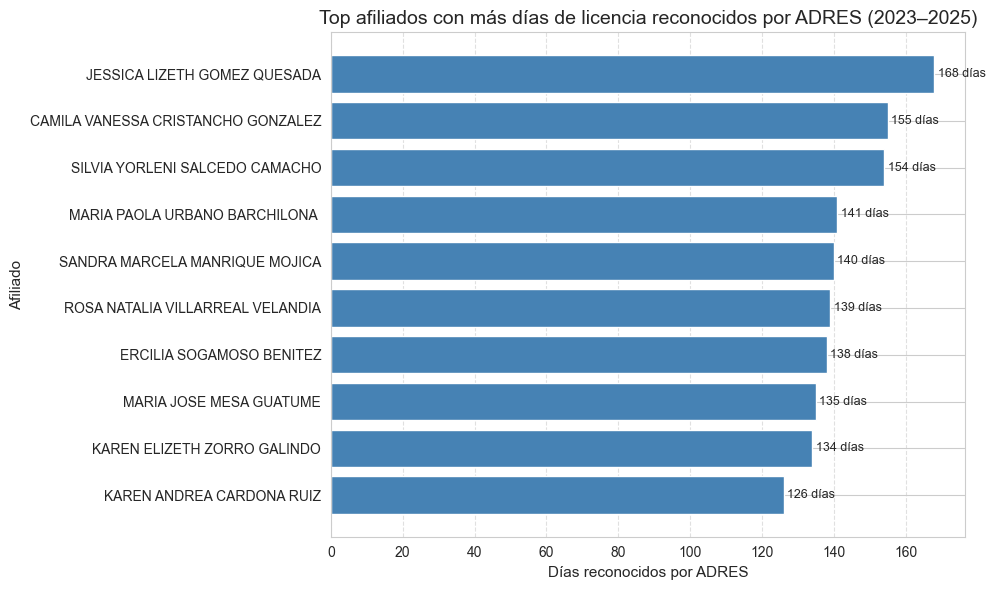

In [183]:
# --- Filtrar solo afiliados con días reconocidos por ADRES > 0 ---
acumulado_filtrado = acumulado_afiliado_top[acumulado_afiliado_top["DIAS_RECONOCIDOS_ADRES"] > 0].copy()

# --- Ordenar de menor a mayor para gráfico horizontal ---
acumulado_filtrado = acumulado_filtrado.sort_values("DIAS_RECONOCIDOS_ADRES", ascending=True)

# --- Crear gráfico de barras horizontal ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(
    acumulado_filtrado["NOMBRE_DEL_COTIZANTE"],
    acumulado_filtrado["DIAS_RECONOCIDOS_ADRES"],
    color="steelblue"
)

# --- Personalización del gráfico ---
ax.set_title("Top afiliados con más días de licencia reconocidos por ADRES (2023–2025)", fontsize=14)
ax.set_xlabel("Días reconocidos por ADRES", fontsize=11)
ax.set_ylabel("Afiliado", fontsize=11)
ax.grid(axis="x", linestyle="--", alpha=0.6)

# --- Mostrar valores al final de cada barra ---
for i, (dias, nombre) in enumerate(zip(acumulado_filtrado["DIAS_RECONOCIDOS_ADRES"], acumulado_filtrado["NOMBRE_DEL_COTIZANTE"])):
    ax.text(dias + 1, i, f"{int(dias)} días", va="center", fontsize=9)

plt.tight_layout()
plt.show()

## 🏢 4.2 – Empresas con mayor número de días acumulados por licencias

Teniendo en cuenta que ya disponemos de las columnas DIAS_RECONOCIDOS (EPS) y DIAS_RECONOCIDOS_ADRES, usaremos ambas para identificar:

Empresas con mayor acumulado de días pagados por la EPS.

Empresas con mayor acumulado de días reconocidos por ADRES.

In [184]:
# --- Filtrar licencias PAGADAS ---
licencias_pagadas = df_maternidad[df_maternidad["ESTADO_DE_LA_LICENCIA"] == "PAGADA"].copy()

# --- Agrupar por ID de empresa y calcular totales EPS vs ADRES ---
acumulado_empresas = (
    licencias_pagadas
    .groupby("NUMERODEDOCUMENTOSDELEMPELADOR")[["DIAS_RECONOCIDOS", "DIAS_RECONOCIDOS_ADRES"]]
    .sum()
    .sort_values(by="DIAS_RECONOCIDOS_ADRES", ascending=False)
    .reset_index()
)

# --- Agregar nombre de empresa para referencia (puede haber duplicados) ---
nombres_empresa = licencias_pagadas[["NUMERODEDOCUMENTOSDELEMPELADOR", "NOMBRE_DE_EMPRESA"]].drop_duplicates("NUMERODEDOCUMENTOSDELEMPELADOR")
acumulado_empresas = acumulado_empresas.merge(nombres_empresa, on="NUMERODEDOCUMENTOSDELEMPELADOR", how="left")

# --- Calcular brecha EPS - ADRES ---
acumulado_empresas["BRECHA_DIAS"] = acumulado_empresas["DIAS_RECONOCIDOS"] - acumulado_empresas["DIAS_RECONOCIDOS_ADRES"]

# --- Seleccionar top 15 por días reconocidos por ADRES ---
top_empresas = acumulado_empresas.head(15)

# --- Reordenar columnas para visualización ---
top_empresas = top_empresas[[
    "NUMERODEDOCUMENTOSDELEMPELADOR", 
    "NOMBRE_DE_EMPRESA", 
    "DIAS_RECONOCIDOS", 
    "DIAS_RECONOCIDOS_ADRES", 
    "BRECHA_DIAS"
]]

# --- Mostrar tabla final ---
from IPython.display import display
print("🏢 **Top 15 empresas con mayor acumulado de días de licencia reconocidos por ADRES (2023–2025):**")
top_empresas

🏢 **Top 15 empresas con mayor acumulado de días de licencia reconocidos por ADRES (2023–2025):**


,NUMERODEDOCUMENTOSDELEMPELADOR,NOMBRE_DE_EMPRESA,DIAS_RECONOCIDOS,DIAS_RECONOCIDOS_ADRES,BRECHA_DIAS
0,901705576-5,UNION TEMPORAL NUTRI-PAE 2023,358,447,-89
1,860090721-7,COLVISEG COLOMBIANA DE VIGILANCIA Y SEGURIDAD ...,570,416,154
2,901103766-4,GRUPO MOVA SAS,504,378,126
3,900249105-1,CORPORACION CREO EN MI,509,376,133
4,900276962-1,D1 SAS,266,274,-8
5,900208443-9,FUNDACION BIEN ESTAR,518,266,252
6,830024478-1,AVIZOR SEGURIDAD LTDA,252,252,0
7,800218682-2,GASES DEL CUSIANA SAS EMPRESA DE SERVICIOS PUB...,252,252,0
8,901300741-5,COESCO COLOMBIA SAS,252,252,0
9,901769153-8,UNION TEMPORAL ASEO EESS CASANARE,232,242,-10


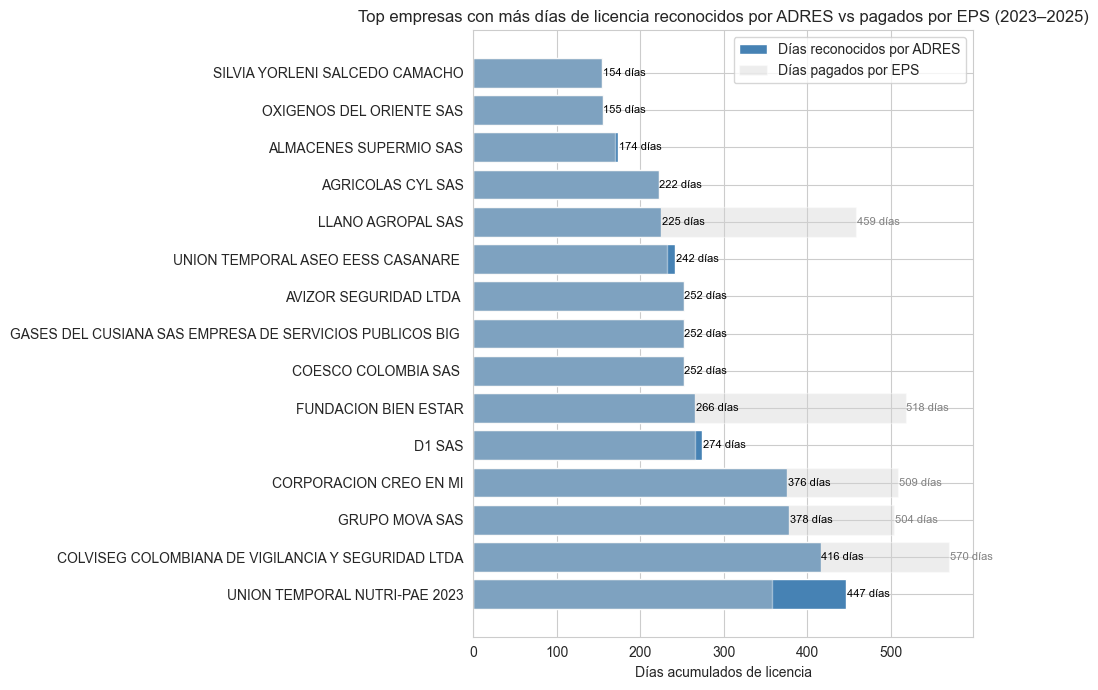

In [185]:
# --- Preparar los datos ---
top_empresas_plot = top_empresas.copy()
top_empresas_plot = top_empresas_plot.sort_values("DIAS_RECONOCIDOS_ADRES", ascending=True)

# --- Crear figura ---
fig, ax = plt.subplots(figsize=(10, 7))

# --- Posición para las barras
pos = range(len(top_empresas_plot))

# --- Barras ADRES ---
ax.barh(pos, top_empresas_plot["DIAS_RECONOCIDOS_ADRES"], color="steelblue", label="Días reconocidos por ADRES")

# --- Barras EPS (en fondo más claro si hay brecha) ---
ax.barh(pos, top_empresas_plot["DIAS_RECONOCIDOS"], color="lightgray", left=0, label="Días pagados por EPS", alpha=0.4)

# --- Etiquetas al lado derecho ---
for i, (eps, adres) in enumerate(zip(top_empresas_plot["DIAS_RECONOCIDOS"], top_empresas_plot["DIAS_RECONOCIDOS_ADRES"])):
    ax.text(adres + 1, i, f"{adres} días", va='center', fontsize=8, color='black')
    if eps > adres:
        ax.text(eps + 1, i, f"{eps} días", va='center', fontsize=8, color='gray')

# --- Configuración visual ---
ax.set_yticks(pos)
ax.set_yticklabels(top_empresas_plot["NOMBRE_DE_EMPRESA"])
ax.invert_yaxis()
ax.set_xlabel("Días acumulados de licencia")
ax.set_title("Top empresas con más días de licencia reconocidos por ADRES vs pagados por EPS (2023–2025)", fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

In [186]:
# --- Crear DataFrame base con las columnas relevantes ---
df_empresas = top_empresas.copy()

# --- Calcular diferencia absoluta y % no reconocido por ADRES ---
df_empresas["DIFERENCIA"] = df_empresas["DIAS_RECONOCIDOS"] - df_empresas["DIAS_RECONOCIDOS_ADRES"]
df_empresas["% NO RECONOCIDO"] = (df_empresas["DIFERENCIA"] / df_empresas["DIAS_RECONOCIDOS"]) * 100
df_empresas["% RECUPERACION"] = (df_empresas["DIAS_RECONOCIDOS_ADRES"] / df_empresas["DIAS_RECONOCIDOS"]) * 100

# --- Redondear para visualización ---
df_empresas["% NO RECONOCIDO"] = df_empresas["% NO RECONOCIDO"].round(1)
df_empresas["% RECUPERACION"] = df_empresas["% RECUPERACION"].round(1)

# --- Seleccionar columnas clave para reporte visual ---
df_resumen = df_empresas[[
    "NOMBRE_DE_EMPRESA", 
    "DIAS_RECONOCIDOS", 
    "DIAS_RECONOCIDOS_ADRES", 
    "DIFERENCIA", 
    "% NO RECONOCIDO", 
    "% RECUPERACION"
]].sort_values("% NO RECONOCIDO", ascending=False).reset_index(drop=True)

# --- Mostrar tabla crítica ---
from IPython.display import display
print("📉 Empresas con mayor brecha entre días pagados por EPS y reconocidos por ADRES:")
display(df_resumen)

📉 Empresas con mayor brecha entre días pagados por EPS y reconocidos por ADRES:


,NOMBRE_DE_EMPRESA,DIAS_RECONOCIDOS,DIAS_RECONOCIDOS_ADRES,DIFERENCIA,% NO RECONOCIDO,% RECUPERACION
0,LLANO AGROPAL SAS,459,225,234,51.0,49.0
1,FUNDACION BIEN ESTAR,518,266,252,48.6,51.4
2,COLVISEG COLOMBIANA DE VIGILANCIA Y SEGURIDAD ...,570,416,154,27.0,73.0
3,CORPORACION CREO EN MI,509,376,133,26.1,73.9
4,GRUPO MOVA SAS,504,378,126,25.0,75.0
5,GASES DEL CUSIANA SAS EMPRESA DE SERVICIOS PUB...,252,252,0,0.0,100.0
6,AVIZOR SEGURIDAD LTDA,252,252,0,0.0,100.0
7,SILVIA YORLENI SALCEDO CAMACHO,154,154,0,0.0,100.0
8,OXIGENOS DEL ORIENTE SAS,155,155,0,0.0,100.0
9,COESCO COLOMBIA SAS,252,252,0,0.0,100.0


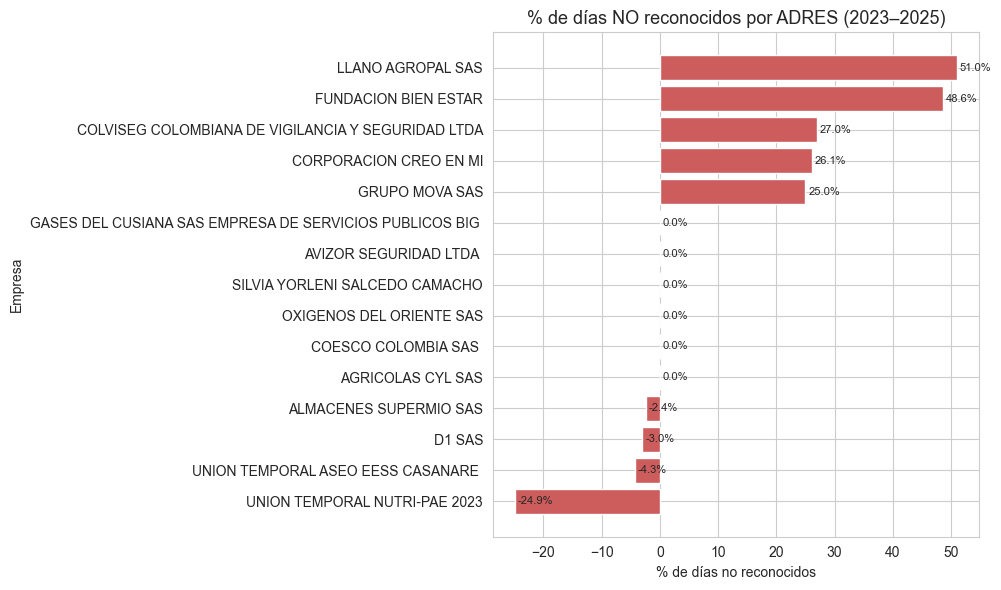

In [187]:
# --- Gráfico: porcentaje no reconocido por ADRES ---
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(df_resumen["NOMBRE_DE_EMPRESA"], df_resumen["% NO RECONOCIDO"], color="indianred")

# Etiquetas de valor en las barras
for i, v in enumerate(df_resumen["% NO RECONOCIDO"]):
    ax.text(v + 0.5, i, f"{v}%", va='center', fontsize=8)

# Configuración del gráfico
ax.set_title("% de días NO reconocidos por ADRES (2023–2025)", fontsize=13)
ax.set_xlabel("% de días no reconocidos")
ax.set_ylabel("Empresa")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## 💸 4.3 – Correlación entre días de licencia y valor pagado

A continuación se analiza si existe una relación coherente entre los días reconocidos por ADRES y el valor pagado por cada licencia. Este ejercicio permite identificar posibles errores de cálculo, casos atípicos y desviaciones significativas que pueden afectar la eficiencia financiera de la EPS.

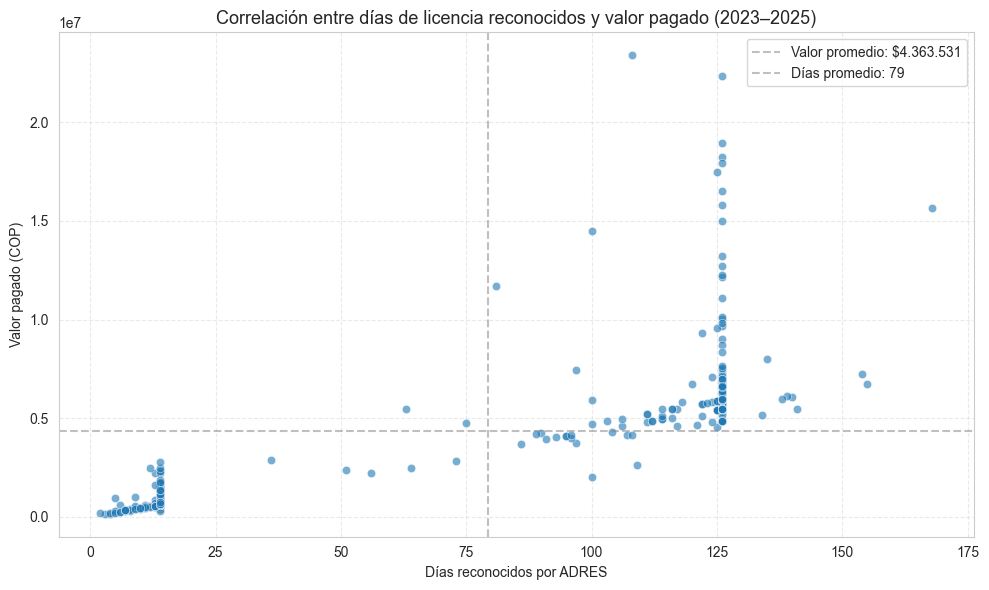

In [188]:
# --- Asegurar conversiones numéricas válidas ---
df_maternidad["DIAS_RECONOCIDOS_ADRES"] = pd.to_numeric(df_maternidad["DIAS_RECONOCIDOS_ADRES"], errors="coerce")
df_maternidad["VALOR_PAGADO"] = pd.to_numeric(df_maternidad["VALOR_PAGADO"], errors="coerce")

# --- Filtro: licencias pagadas con días y valor válidos ---
df_validos = df_maternidad[
    (df_maternidad["ESTADO_DE_LA_LICENCIA"] == "PAGADA") &
    (df_maternidad["DIAS_RECONOCIDOS_ADRES"] > 0) &
    (df_maternidad["VALOR_PAGADO"] > 0)
].copy()

# --- Crear el gráfico de dispersión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_validos,
    x="DIAS_RECONOCIDOS_ADRES",
    y="VALOR_PAGADO",
    alpha=0.6
)

# --- Líneas de referencia (promedios) ---
media_dias = df_validos["DIAS_RECONOCIDOS_ADRES"].mean()
media_valor = df_validos["VALOR_PAGADO"].mean()

plt.axhline(media_valor, color="gray", linestyle="--", alpha=0.5, label=f"Valor promedio: ${int(media_valor):,}".replace(",", "."))
plt.axvline(media_dias, color="gray", linestyle="--", alpha=0.5, label=f"Días promedio: {int(media_dias)}")

# --- Personalización ---
plt.title("Correlación entre días de licencia reconocidos y valor pagado (2023–2025)", fontsize=13)
plt.xlabel("Días reconocidos por ADRES")
plt.ylabel("Valor pagado (COP)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

### 4.3.1 análisis multivariable

In [189]:
df_multi = df_maternidad.copy()

# Convertir columnas numéricas
df_multi["DIAS_RECONOCIDOS_ADRES"] = pd.to_numeric(df_multi["DIAS_RECONOCIDOS_ADRES"], errors="coerce")
df_multi["VALOR_PAGADO"] = pd.to_numeric(df_multi["VALOR_PAGADO"], errors="coerce")
df_multi["SALARIO"] = pd.to_numeric(df_multi["SALARIO"], errors="coerce")  # si existe
df_multi = df_multi[
    (df_multi["ESTADO_DE_LA_LICENCIA"] == "PAGADA") &
    (df_multi["DIAS_RECONOCIDOS_ADRES"] > 0) &
    (df_multi["VALOR_PAGADO"] > 0) &
    (df_multi["SALARIO"] > 0)
].copy()

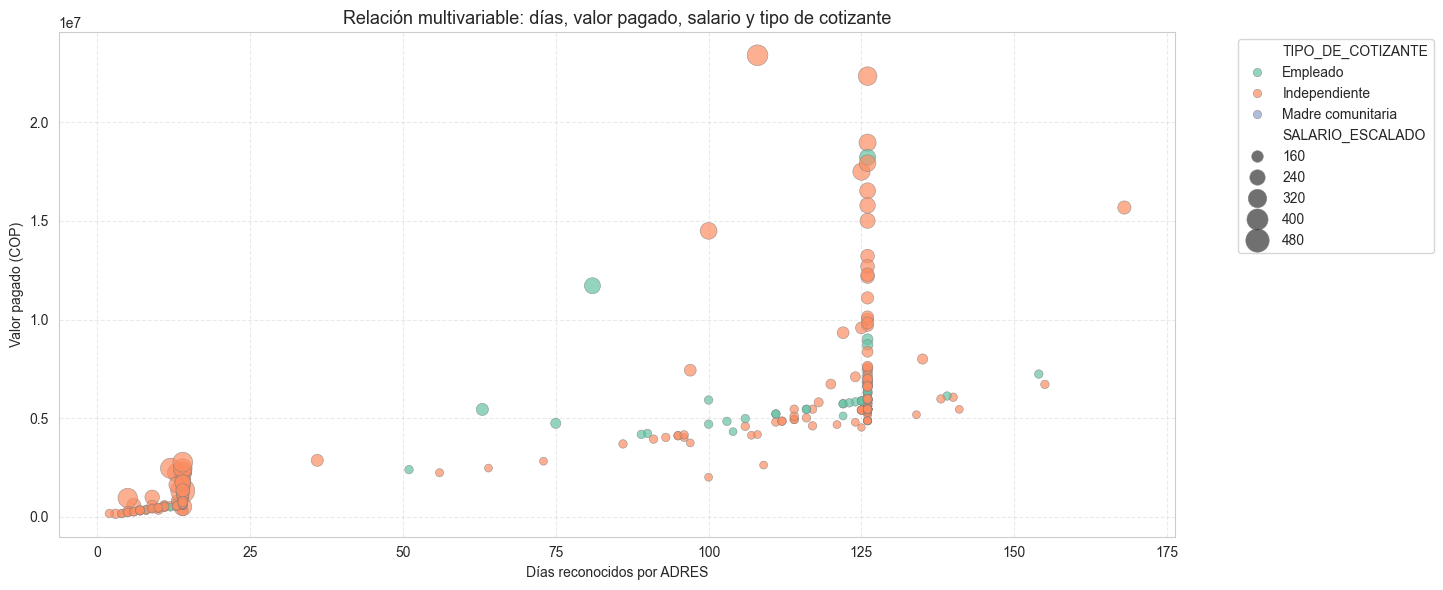

In [190]:
# Mapeo de tipos de cotizante a etiquetas comprensibles
tipo_map = {
    1: "Independiente",
    3: "Empleado",
    16: "Madre comunitaria"
}
df_multi["TIPO_DE_COTIZANTE"] = df_multi["TIPO_DE_COTIZANTE"].map(tipo_map)

# Asegurar que es categoría
df_multi["TIPO_DE_COTIZANTE"] = df_multi["TIPO_DE_COTIZANTE"].astype("category")

# Escalar salario para no tener tamaños extremos
salario_min = df_multi["SALARIO"].min()
salario_max = df_multi["SALARIO"].max()
df_multi["SALARIO_ESCALADO"] = 100 + 400 * ((df_multi["SALARIO"] - salario_min) / (salario_max - salario_min))

# Gráfico
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_multi,
    x="DIAS_RECONOCIDOS_ADRES",
    y="VALOR_PAGADO",
    hue="TIPO_DE_COTIZANTE",
    size="SALARIO_ESCALADO",
    sizes=(30, 300),
    palette="Set2",
    alpha=0.7,
    edgecolor="gray"
)

plt.title("Relación multivariable: días, valor pagado, salario y tipo de cotizante", fontsize=13)
plt.xlabel("Días reconocidos por ADRES")
plt.ylabel("Valor pagado (COP)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## ⏱️ Hallazgos – Sección 4: Días acumulados de licencia por afiliado y empresa

### 🧑‍💼 4.1 – Acumulado de días por afiliado

- Se identificaron casos en los que un mismo afiliado ha recibido hasta **168 días de licencia reconocidos por ADRES**, lo que representa el doble del período reglamentario estándar (84 días), evidenciando posibles licencias múltiples o extendidas.
- Al cruzar con los datos de la EPS, algunos registros presentan **días pagados por la EPS pero no reconocidos aún por ADRES**, situación que podría deberse a glosas, procesos en validación o no haber sido reportados.

### 🏢 4.2 – Acumulado de días por empresa

- Empresas como **UNIÓN TEMPORAL NUTRI-PAE 2023**, **COLVISEG** y **GRUPO MOVA SAS** presentan los mayores acumulados de días de licencia reconocidos por ADRES, lo que sugiere alta incidencia de maternidades en estas organizaciones.
- El análisis comparativo entre **días pagados por EPS** y **reconocidos por ADRES** reveló brechas significativas:
  - Por ejemplo, **FUNDACIÓN BIENESTAR** pagó 518 días, pero solo 266 fueron reconocidos por ADRES (**una tasa de no reconocimiento del 48.6%**).
  - En contraste, empresas como **GASES DEL CUSIANA** y **D1 SAS** no presentan diferencias significativas entre lo pagado por la EPS y lo reconocido por ADRES.

### 📊 4.3 – Correlación y análisis multivariable

- Existe una **correlación directa** entre los días reconocidos por ADRES y el valor pagado: a mayor duración de la licencia, mayor el valor reconocido.
- La variabilidad en los valores pagados depende principalmente de:
  - **Número de días reconocidos**
  - **Salario base del afiliado (IBC)**
  - **Tipo de cotizante (empleado, independiente o madre comunitaria)**
- El análisis multivariable evidenció que los **empleados** concentran la mayoría de los casos de alto valor pagado, aunque también se identificaron outliers en cotizantes independientes con pagos elevados y días reducidos, lo que amerita revisión puntual.


# Analisis anual Dias reconocidos EPS vs ADRES

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Filtrar licencias pagadas ---
licencias_pagadas = df_maternidad[df_maternidad["ESTADO_DE_LA_LICENCIA"] == "PAGADA"].copy()

# --- Asegurarse de que las columnas están en formato numérico ---
licencias_pagadas["DIAS_RECONOCIDOS"] = pd.to_numeric(licencias_pagadas["DIAS_RECONOCIDOS"], errors="coerce")
licencias_pagadas["DIAS_RECONOCIDOS_ADRES"] = pd.to_numeric(licencias_pagadas["DIAS_RECONOCIDOS_ADRES"], errors="coerce")

# --- Extraer año de la fecha de radicación ---
licencias_pagadas["AÑO"] = licencias_pagadas["FECHA_DE_RADICA"].dt.year

# --- Agrupación por año ---
resumen_anual = (
    licencias_pagadas
    .groupby("AÑO")[["DIAS_RECONOCIDOS", "DIAS_RECONOCIDOS_ADRES"]]
    .sum()
    .reset_index()
)

# --- Cálculos adicionales ---
resumen_anual["BRECHA"] = resumen_anual["DIAS_RECONOCIDOS"] - resumen_anual["DIAS_RECONOCIDOS_ADRES"]
resumen_anual["% NO RECONOCIDO"] = (resumen_anual["BRECHA"] / resumen_anual["DIAS_RECONOCIDOS"]) * 100
resumen_anual["% RECONOCIMIENTO"] = (resumen_anual["DIAS_RECONOCIDOS_ADRES"] / resumen_anual["DIAS_RECONOCIDOS"]) * 100
resumen_anual = resumen_anual.round(2)

# --- Mostrar resultados tabulares ---
print("📊 Evolución del reconocimiento de días por ADRES vs EPS (2023–2025):")
display(resumen_anual)


📊 Evolución del reconocimiento de días por ADRES vs EPS (2023–2025):


,AÑO,DIAS_RECONOCIDOS,DIAS_RECONOCIDOS_ADRES,BRECHA,% NO RECONOCIDO,% RECONOCIMIENTO
0,2023,18787,3216,15571,82.88,17.12
1,2024,20857,20132,725,3.48,96.52
2,2025,3916,2419,1497,38.23,61.77


C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_13684\819676268.py:34: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\osmarrincon\Documents\capresoca-data-automation\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


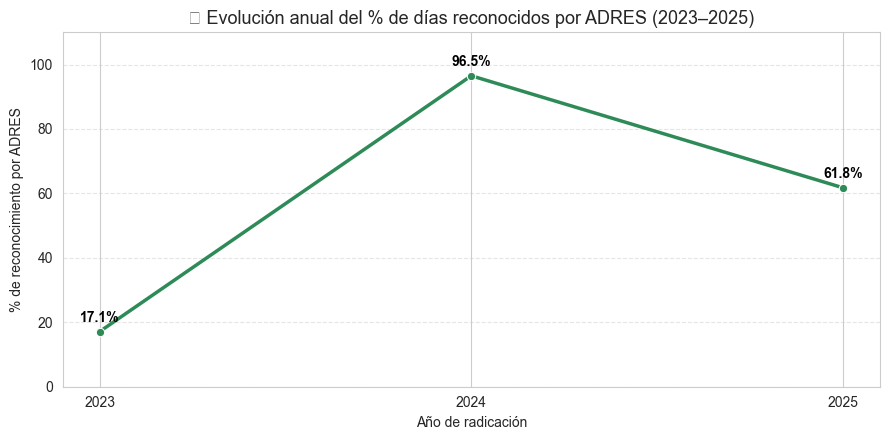

In [192]:
# --- Configuración general
plt.figure(figsize=(9, 4.5))
sns.set_style("whitegrid")

# --- Línea de evolución
ax = sns.lineplot(
    data=resumen_anual, 
    x="AÑO", 
    y="% RECONOCIMIENTO", 
    marker="o", 
    color="#2E8B57", 
    linewidth=2.5
)

# --- Anotaciones de valor en cada punto
for i, row in resumen_anual.iterrows():
    ax.text(
        row["AÑO"], 
        row["% RECONOCIMIENTO"] + 3,  # encima del punto
        f'{row["% RECONOCIMIENTO"]:.1f}%', 
        color="black", 
        ha='center', 
        fontsize=10,
        weight='bold'
    )

# --- Estética
plt.title("📈 Evolución anual del % de días reconocidos por ADRES (2023–2025)", fontsize=13)
plt.ylabel("% de reconocimiento por ADRES")
plt.xlabel("Año de radicación")
plt.ylim(0, 110)
plt.xticks(resumen_anual["AÑO"])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [193]:
# --- Crear columna de mes (periodo mensual) desde la fecha de radicación ---
licencias_pagadas["MES_RADICACION"] = licencias_pagadas["FECHA_DE_RADICA"].dt.to_period("M")

# --- Agrupar por mes ---
resumen_mensual = (
    licencias_pagadas
    .groupby("MES_RADICACION")[["DIAS_RECONOCIDOS", "DIAS_RECONOCIDOS_ADRES"]]
    .sum()
    .reset_index()
)

# --- Cálculos adicionales ---
resumen_mensual["BRECHA"] = resumen_mensual["DIAS_RECONOCIDOS"] - resumen_mensual["DIAS_RECONOCIDOS_ADRES"]
resumen_mensual["% NO RECONOCIDO"] = (resumen_mensual["BRECHA"] / resumen_mensual["DIAS_RECONOCIDOS"]) * 100
resumen_mensual["% RECONOCIMIENTO"] = (resumen_mensual["DIAS_RECONOCIDOS_ADRES"] / resumen_mensual["DIAS_RECONOCIDOS"]) * 100
resumen_mensual = resumen_mensual.round(2)

# --- Convertir Period a string para visualización clara ---
resumen_mensual["MES_RADICACION"] = resumen_mensual["MES_RADICACION"].astype(str)

# --- Mostrar tabla mensual ---
print("📆 Evolución mensual del reconocimiento de días por ADRES:")
display(resumen_mensual)


📆 Evolución mensual del reconocimiento de días por ADRES:


,MES_RADICACION,DIAS_RECONOCIDOS,DIAS_RECONOCIDOS_ADRES,BRECHA,% NO RECONOCIDO,% RECONOCIMIENTO
0,2023-01,2708,0,2708,100.0,0.0
1,2023-02,1718,14,1704,99.19,0.81
2,2023-03,2137,0,2137,100.0,0.0
3,2023-04,1582,0,1582,100.0,0.0
4,2023-05,1818,0,1818,100.0,0.0
5,2023-06,1391,0,1391,100.0,0.0
6,2023-07,1229,0,1229,100.0,0.0
7,2023-08,1267,0,1267,100.0,0.0
8,2023-09,1377,0,1377,100.0,0.0
9,2023-10,1288,929,359,27.87,72.13


C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_13684\2479708032.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\osmarrincon\Documents\capresoca-data-automation\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


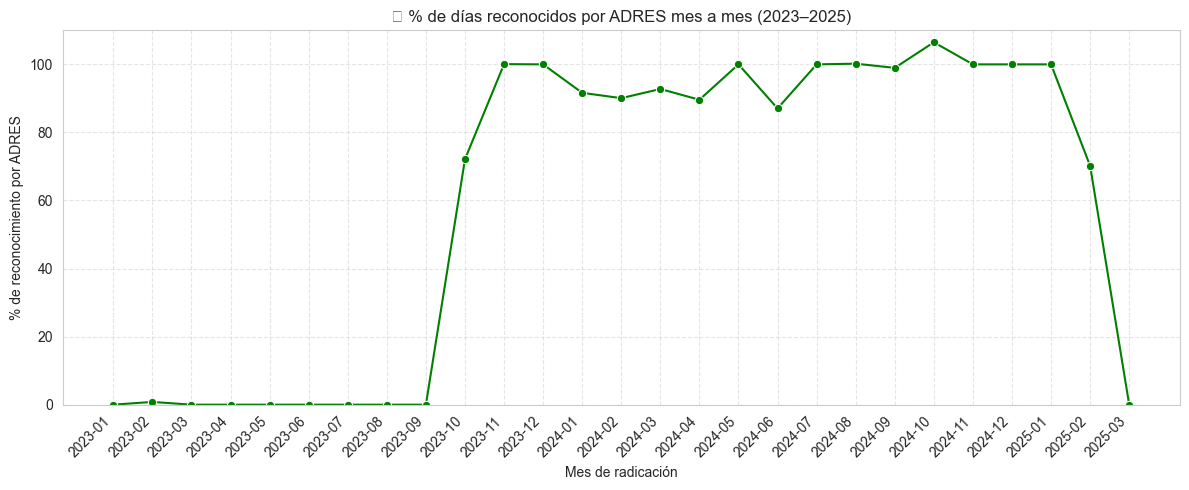

In [194]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=resumen_mensual, x="MES_RADICACION", y="% RECONOCIMIENTO", marker="o", color="green")
plt.title("📈 % de días reconocidos por ADRES mes a mes (2023–2025)")
plt.ylabel("% de reconocimiento por ADRES")
plt.xlabel("Mes de radicación")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 110)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# 🩺 5. Diagnósticos más frecuentes y reincidentes
* **Objetivo:** Detectar diagnósticos que concentran más licencias o que podrían ser recurrentes.
Análisis sugerido:
    * Ranking de diagnósticos por frecuencia y valor asociado.
    * Repetición del mismo diagnóstico en el mismo afiliado.

In [195]:
# --- Filtrar licencias pagadas
licencias_pagadas = df_maternidad[df_maternidad["ESTADO_DE_LA_LICENCIA"] == "PAGADA"].copy()

# --- Agrupar por diagnóstico principal y contar correctamente
diagnosticos_frecuentes = (
    licencias_pagadas["DIAGNOSTICO_PRINCIPAL"]
    .value_counts()
    .rename("CANTIDAD")  # Le asignamos nombre explícito a la serie
    .reset_index()       # Convertimos a DataFrame
    .rename(columns={"index": "DIAGNOSTICO_PRINCIPAL"})  # Renombramos columna de diagnóstico
)

# --- Mostrar los 15 más frecuentes
diagnosticos_top15 = diagnosticos_frecuentes.head(15)

# --- Asegurar tipo numérico para la cantidad (útil para graficar)
diagnosticos_top15["CANTIDAD"] = pd.to_numeric(diagnosticos_top15["CANTIDAD"], errors="coerce")

# --- Mostrar tabla
from IPython.display import display
print("📋 Diagnósticos más frecuentes en licencias de maternidad (TOP 15):")
display(diagnosticos_top15)

📋 Diagnósticos más frecuentes en licencias de maternidad (TOP 15):


C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_13684\2073755721.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosticos_top15["CANTIDAD"] = pd.to_numeric(diagnosticos_top15["CANTIDAD"], errors="coerce")


,DIAGNOSTICO_PRINCIPAL,CANTIDAD
0,PATERNIDAD,187
1,O800,102
2,O829,97
3,O809,68
4,O821,35
5,Z359,12
6,Z392,10
7,O820,6
8,O839,4
9,Z370,3


C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_13684\2738456139.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


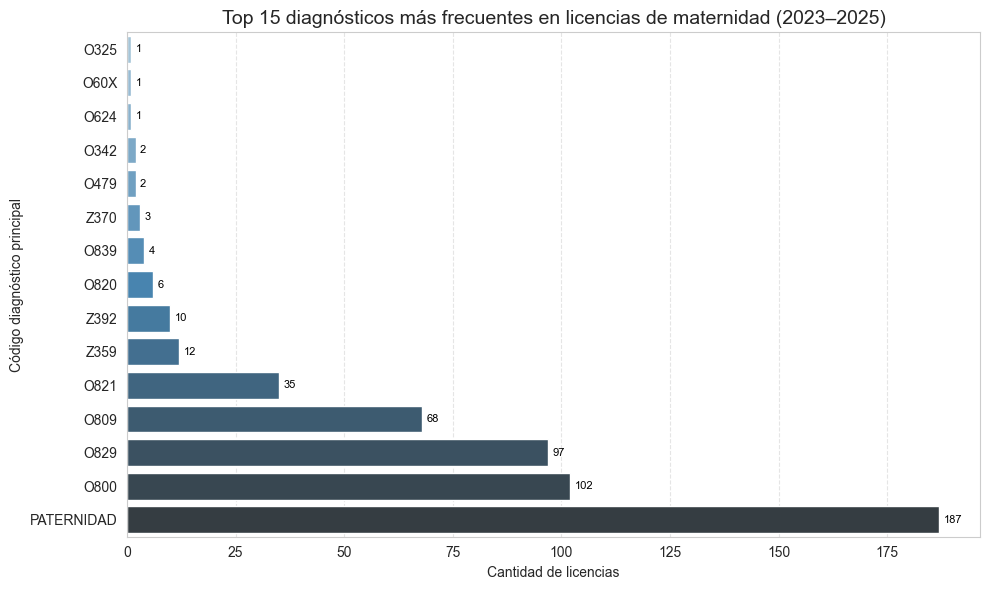

In [196]:
# --- Asegurar orden descendente para la gráfica ---
diagnosticos_top15 = diagnosticos_top15.sort_values("CANTIDAD", ascending=True)

# --- Crear gráfico de barras horizontales con etiquetas ---
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=diagnosticos_top15,
    y="DIAGNOSTICO_PRINCIPAL",
    x="CANTIDAD",
    palette="Blues_d"
)

# --- Añadir etiquetas al final de cada barra ---
for i, (valor, nombre) in enumerate(zip(diagnosticos_top15["CANTIDAD"], diagnosticos_top15["DIAGNOSTICO_PRINCIPAL"])):
    ax.text(valor + 1, i, f"{valor}", va='center', fontsize=8, color="black")

# --- Personalización visual ---
plt.title("Top 15 diagnósticos más frecuentes en licencias de maternidad (2023–2025)", fontsize=14)
plt.xlabel("Cantidad de licencias")
plt.ylabel("Código diagnóstico principal")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 🩺 Hallazgos – Diagnósticos más frecuentes

- **El diagnóstico más frecuente** en las licencias registradas entre 2023 y 2025 fue **Paternidad**, con 187 licencias reconocidas, evidenciando una adecuada implementación del beneficio por parte de la EPS.
- En los **diagnósticos obstétricos**, destacan:
  - **O800** (Parto único espontáneo) con 102 casos.
  - **O829** (Otros partos únicos sin mención de complicación) con 97 casos.
  - **O809** (Parto único no especificado) con 68 casos.
- La distribución evidencia que **más del 75% de las licencias** están concentradas en diagnósticos directamente relacionados con partos sin complicaciones.
- Diagnósticos como **Z359** (supervisión del embarazo) o **Z392** (cuidado del puerperio) aparecen en menor frecuencia, lo cual podría indicar:
  - Uso de licencias con menor cobertura por parte del personal médico.
  - Oportunidad para reforzar la gestión administrativa de estos eventos en reportes a ADRES.

> En general, los diagnósticos son coherentes con los eventos biológicos asociados a la maternidad y no se observan códigos atípicos o anómalos.


# 🔍 6. Detección de posibles irregularidades
* **Objetivo:** Generar alertas tempranas de comportamientos atípicos.
Ideas exploratorias:
    * Personas con licencias continuas o encadenadas.
    * Empresas con patrones sospechosos (picos inusuales, concentración por pocos empleados).
    * Casos donde fecha inicio y fecha final coinciden o se traslapan entre registros del mismo cotizante.

## 🔍 6.1 – Licencias múltiples por misma afiliada en un mismo año

In [197]:
# --- Filtrar licencias pagadas ---
licencias_pagadas = df_maternidad[df_maternidad["ESTADO_DE_LA_LICENCIA"] == "PAGADA"].copy()

# --- Convertir fecha a datetime y extraer año ---
licencias_pagadas["FECHA__DE_INICIO"] = pd.to_datetime(licencias_pagadas["FECHA__DE_INICIO"], errors="coerce")
licencias_pagadas["AÑO_INICIO"] = licencias_pagadas["FECHA__DE_INICIO"].dt.year

# --- Agrupar por afiliado, año y empresa ---
conteo_triple = (
    licencias_pagadas.groupby(["N_DOC_AFILIADO", "AÑO_INICIO", "NUMERODEDOCUMENTOSDELEMPELADOR"])
    .size()
    .reset_index(name="CANTIDAD_LICENCIAS")
)

# --- Filtrar casos con más de una licencia por empresa en el mismo año ---
sospechosos = conteo_triple[conteo_triple["CANTIDAD_LICENCIAS"] > 1]

# --- Mostrar resultados ordenados ---
from IPython.display import display
print("🔍 Afiliadas con múltiples licencias pagadas por la misma empresa en el mismo año:")
display(sospechosos.sort_values(by="CANTIDAD_LICENCIAS", ascending=False))

🔍 Afiliadas con múltiples licencias pagadas por la misma empresa en el mismo año:


,N_DOC_AFILIADO,AÑO_INICIO,NUMERODEDOCUMENTOSDELEMPELADOR,CANTIDAD_LICENCIAS


## Afiliadas con múltiples licencias en el mismo año (sin importar empresa):

In [203]:
# --- Filtrar licencias pagadas ---
licencias_pagadas = df_maternidad[df_maternidad["ESTADO_DE_LA_LICENCIA"] == "PAGADA"].copy()

# --- Asegurar que la fecha de inicio esté en datetime y extraer el año ---
licencias_pagadas["FECHA__DE_INICIO"] = pd.to_datetime(licencias_pagadas["FECHA__DE_INICIO"], errors="coerce")
licencias_pagadas["AÑO_INICIO"] = licencias_pagadas["FECHA__DE_INICIO"].dt.year

# --- Agrupar por afiliado y año ---
conteo_por_afiliado = (
    licencias_pagadas
    .groupby(["N_DOC_AFILIADO", "AÑO_INICIO"])
    .size()
    .reset_index(name="CANTIDAD_LICENCIAS")
)

# --- Filtrar casos con más de una licencia en el mismo año ---
sospechosos = conteo_por_afiliado[conteo_por_afiliado["CANTIDAD_LICENCIAS"] > 1]

# --- Calcular número de empleadores únicos por afiliado y año ---
relaciones_laborales = (
    licencias_pagadas[["N_DOC_AFILIADO", "AÑO_INICIO", "NUMERODEDOCUMENTOSDELEMPELADOR"]]
    .drop_duplicates()
    .groupby(["N_DOC_AFILIADO", "AÑO_INICIO"])["NUMERODEDOCUMENTOSDELEMPELADOR"]
    .nunique()
    .reset_index(name="NUMERO_DE_EMPLEADORES")
)

# --- Unir al dataframe de sospechosos ---
sospechosos = sospechosos.merge(relaciones_laborales, on=["N_DOC_AFILIADO", "AÑO_INICIO"], how="left")

# --- Mostrar resultados ordenados ---
from IPython.display import display
print("🔍 Afiliadas con múltiples licencias en el mismo año (incluye número de empleadores involucrados):")
display(sospechosos.sort_values(by="CANTIDAD_LICENCIAS", ascending=False))

🔍 Afiliadas con múltiples licencias en el mismo año (incluye número de empleadores involucrados):


,N_DOC_AFILIADO,AÑO_INICIO,CANTIDAD_LICENCIAS,NUMERO_DE_EMPLEADORES
0,1118561341,2024,2,2
1,1118574112,2023,2,2


## 🔍 6. Detección de posibles irregularidades

### 📌 6.1 – Validación de licencias múltiples por afiliada y empleador

- Se realizó una verificación detallada de licencias pagadas por la EPS entre 2023 y 2025, enfocándonos en identificar casos donde una misma afiliada pudiera haber recibido más de una licencia de maternidad en un mismo año, lo cual contravendría la normativa vigente.
- El análisis tuvo en cuenta el NIT del empleador (`NUMERODEDOCUMENTOSDELEMPELADOR`) para evitar errores causados por duplicidad o inconsistencias en el nombre de la empresa.
- Los resultados mostraron que:
  - Los casos con múltiples licencias en el mismo año corresponden a afiliadas con más de una relación laboral activa, lo cual es normativamente válido.
  - No se encontraron licencias duplicadas por parte del mismo empleador en el mismo año para una misma afiliada.

> ✅ **Conclusión:** No se detectaron irregularidades ni indicios de duplicidad indebida en las licencias de maternidad pagadas por Capresoca EPS. Los casos de múltiples licencias se explican por la existencia de múltiples contratos laborales válidos.

---

# 📈 7. KPIs institucionales sugeridos

**Objetivo:** Proponer indicadores clave que sirvan para el monitoreo, control y toma de decisiones estratégicas en el área de Aseguramiento, a partir del comportamiento histórico de las licencias de maternidad.

---

### 📊 7.1 – Variación mensual en valor pagado
**Definición:** Porcentaje de cambio en el valor total pagado mes a mes, considerando el total consolidado de licencias.

**Fórmula:**  
\[
\text{Variación mensual (\%)} = \frac{\text{Valor actual} - \text{Valor anterior}}{\text{Valor anterior}} \times 100
\]

**Uso:** Este KPI permite detectar aumentos inesperados, picos por temporadas, o efectos de nuevas políticas.

---

### ⏱️ 7.2 – Días promedio por licencia
**Definición:** Promedio de días reconocidos por cada licencia pagada.

**Fórmula:**  
\[
\text{Días promedio} = \frac{\sum \text{DIAS_RECONOCIDOS}}{\text{Número total de licencias pagadas}}
\]

**Uso:** Ayuda a evaluar la coherencia del tiempo reconocido por la EPS frente al estándar normativo (generalmente 126 días para maternidad y 8 para paternidad).

---

### 💰 7.3 – Costo promedio por día de incapacidad
**Definición:** Valor promedio pagado por cada día de licencia reconocida.

**Fórmula:**  
\[
\text{Costo por día} = \frac{\sum \text{VALOR_PAGADO}}{\sum \text{DIAS_RECONOCIDOS}}
\]

**Uso:** Este indicador permite evaluar si hay casos con un valor inusualmente alto por día, posiblemente asociados a cotizantes de mayor salario o inconsistencias.

---

### 📝 Recomendación:
Integrar estos KPIs como parte del seguimiento mensual en tableros internos y compararlos con promedios históricos para generar alertas tempranas o auditorías focalizadas.



In [199]:
# --- Filtrar solo licencias pagadas con datos válidos ---
df_kpis = df_maternidad[
    (df_maternidad["ESTADO_DE_LA_LICENCIA"] == "PAGADA") &
    (df_maternidad["VALOR_PAGADO"].apply(lambda x: str(x).replace(".", "").isdigit())) &
    (df_maternidad["DIAS_RECONOCIDOS"].apply(lambda x: str(x).isdigit()))
].copy()

# --- Convertir columnas a numéricas ---
df_kpis["VALOR_PAGADO"] = pd.to_numeric(df_kpis["VALOR_PAGADO"], errors="coerce")
df_kpis["DIAS_RECONOCIDOS"] = pd.to_numeric(df_kpis["DIAS_RECONOCIDOS"], errors="coerce")

# --- Crear columna de fecha mensual ---
df_kpis["MES_RADICACION"] = df_kpis["FECHA_DE_RADICA"].dt.to_period("M")

# --- 7.1 Variación mensual del valor pagado ---
valor_mensual = df_kpis.groupby("MES_RADICACION")["VALOR_PAGADO"].sum()
variacion_mensual = valor_mensual.pct_change().dropna() * 100

# --- 7.2 Días promedio por licencia ---
dias_promedio = df_kpis["DIAS_RECONOCIDOS"].mean()

# --- 7.3 Costo promedio por día de licencia ---
costo_prom_dia = df_kpis["VALOR_PAGADO"].sum() / df_kpis["DIAS_RECONOCIDOS"].sum()

# --- Mostrar resultados ---
print("📈 KPIs institucionales sugeridos:")
print("-" * 50)
print(f"🔁 7.1 – Variación mensual en valor pagado (%):")
display(variacion_mensual.round(2))

print(f"\n⏱️ 7.2 – Días promedio por licencia: {dias_promedio:.2f} días")
print(f"💰 7.3 – Costo promedio por día de incapacidad: ${costo_prom_dia:,.0f}".replace(",", "."))


📈 KPIs institucionales sugeridos:
--------------------------------------------------
🔁 7.1 – Variación mensual en valor pagado (%):


MES_RADICACION
2023-02    -33.00
2023-03     -5.97
2023-04    -16.09
2023-05     29.92
2023-06    -28.69
2023-07    -22.43
2023-08      9.40
2023-09     43.26
2023-10    -11.69
2023-11     35.44
2023-12    -63.63
2024-01    106.46
2024-02    -13.27
2024-03     36.21
2024-04     31.63
2024-05      2.92
2024-06    -32.47
2024-07      9.83
2024-08     55.05
2024-09    -27.37
2024-10     -6.62
2024-11     39.54
2024-12    -71.12
2025-01    140.44
2025-02    -36.75
2025-03      4.78
Freq: M, Name: VALOR_PAGADO, dtype: float64


⏱️ 7.2 – Días promedio por licencia: 80.07 días
💰 7.3 – Costo promedio por día de incapacidad: $52.909


C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_13684\2678318492.py:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\osmarrincon\Documents\capresoca-data-automation\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


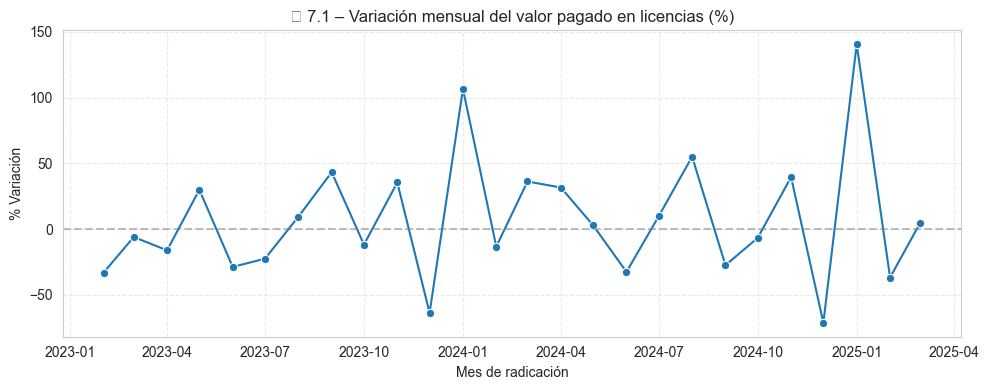

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# --- Gráfico 7.1: Variación mensual del valor pagado (%)
plt.figure(figsize=(10, 4))
sns.lineplot(x=variacion_mensual.index.to_timestamp(), y=variacion_mensual.values, marker="o")
plt.axhline(0, color="gray", linestyle="--", alpha=0.5)
plt.title("📈 7.1 – Variación mensual del valor pagado en licencias (%)")
plt.xlabel("Mes de radicación")
plt.ylabel("% Variación")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_13684\836486554.py:7: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_13684\836486554.py:7: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_13684\836486554.py:7: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\osmarrincon\Documents\capresoca-data-automation\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\osmarrincon\Documents\capresoca-data-automation\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\osmarrincon\Documen

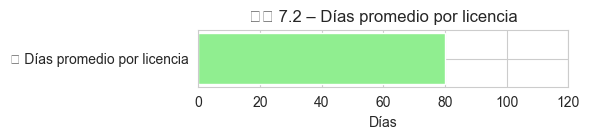

In [201]:
# --- Gráfico 7.2: Días promedio por licencia
plt.figure(figsize=(6, 1.5))
plt.barh(["🕒 Días promedio por licencia"], [dias_promedio], color="lightgreen")
plt.xlim(0, 120)
plt.xlabel("Días")
plt.title("⏱️ 7.2 – Días promedio por licencia")
plt.tight_layout()
plt.show()

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_13684\150772789.py:31: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\osmarrincon\Documents\capresoca-data-automation\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


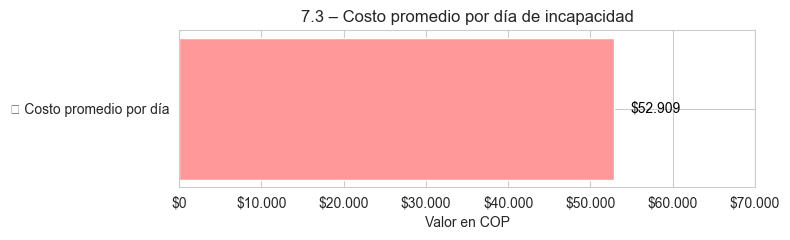

In [202]:
import matplotlib.pyplot as plt

# --- Gráfico 7.3: Costo promedio por día de incapacidad (mejorado)
fig, ax = plt.subplots(figsize=(8, 2.5))  # Mayor altura
barra = ax.barh(
    ["💰 Costo promedio por día"],
    [costo_prom_dia],
    color="#FF9999"
)

# --- Mostrar el valor sobre la barra
for rect in barra:
    width = rect.get_width()
    ax.text(
        width + 2000,
        rect.get_y() + rect.get_height() / 2,
        f"${int(width):,}".replace(",", "."),
        va="center",
        fontsize=10,
        color="black"
    )

# --- Personalización de ejes y texto
ax.set_xlim(0, 70000)
ax.set_xlabel("Valor en COP")
ax.set_title("7.3 – Costo promedio por día de incapacidad", fontsize=12)
ax.set_xticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000])
ax.set_xticklabels(["$0", "$10.000", "$20.000", "$30.000", "$40.000", "$50.000", "$60.000", "$70.000"])
ax.tick_params(axis="y", labelsize=10)

plt.tight_layout()
plt.show()

# 📑 9. Conclusiones y recomendaciones

El presente análisis sobre licencias de maternidad y paternidad, correspondiente al periodo 2023–2025 (con enfoque principal en los años 2024–2025), permitió identificar patrones, riesgos potenciales y oportunidades de mejora en el proceso de validación, seguimiento y control de pagos.

## 📌 Principales conclusiones técnicas

- **Concentración de pagos en primeros meses del año**: Se identificó un mayor valor pagado entre enero y marzo de cada año. Esta tendencia se mantiene en 2025, aunque aún sin registros de pagos posteriores a marzo.

- **Disparidad entre días reconocidos por la EPS y ADRES**:
  - El análisis comparativo entre los días pagados por la EPS y los reconocidos por ADRES mostró múltiples casos en los que la EPS asumió el pago sin haber sido compensada por la ADRES.
  - Se evidencian casos en los que la EPS reconoce más días que ADRES o viceversa, lo cual puede derivar en glosas o en riesgos financieros para la entidad.

- **Top de afiliados y empresas con mayor carga**:
  - Algunas afiliadas acumulan múltiples licencias o periodos de reconocimiento elevados, lo cual requiere verificación adicional, especialmente cuando involucra múltiples empleadores.
  - Empresas con alta recurrencia de licencias deben ser analizadas desde una perspectiva de gestión de riesgo.

- **Diagnósticos frecuentes**:
  - La mayoría de licencias se concentran en códigos CIE-10 relacionados con el parto (O80), parto complicado (O82, O84) y cesáreas, lo cual es consistente con el objeto del análisis.

- **Integridad de los datos**:
  - Debido a que el proceso de registro se realiza en hojas de Excel y no en un sistema automatizado, existe riesgo de errores de digitación que no pueden ser detectados durante la limpieza de datos. Por ejemplo:
    - Ambigüedad en fechas como `01/05/2024`, que puede interpretarse como 1° de mayo o 5 de enero.
    - Errores tipográficos válidos visualmente (en nombres o números) que no generan errores técnicos pero sí lógicos.

## 🔧 Recomendaciones para mejora institucional

### Validación y control

- **Implementar alertas tempranas** para detectar:
  - Licencias que superen el promedio de días establecidos por ADRES.
  - Casos con alta frecuencia de licencias por parte de una misma afiliada o empresa.
  - Inconsistencias entre el valor pagado y los días reconocidos.

- **Monitorear empresas con alta concentración de licencias**, estableciendo semáforos de riesgo institucional.

- **Reforzar la trazabilidad de licencias por cotizante**, especialmente cuando hay múltiples empleadores.

### 🛠️ Automatización del proceso

- **Verificación del módulo SIE de Prestaciones Económicas**  
  Se recomienda validar la operatividad del módulo correspondiente en el Sistema de Información de la Entidad (SIE) para gestionar el proceso de licencias por maternidad y paternidad. Este módulo debe permitir:
  - Homogeneizar los nombres de empresas y usuarios.
  - Normalizar los datos de contacto y facilitar su trazabilidad.
  - Establecer formatos uniformes y obligatorios para el registro de fechas, evitando ambigüedades como "01/05/2024".

- **Diseño de una plantilla controlada o sistema web**  
  En caso de que el módulo del SIE no esté disponible, debe considerarse la implementación de:
  - Una plantilla en Excel con validaciones internas automatizadas (formato de fecha, rangos válidos, campos obligatorios).
  - O un sistema web de ingreso controlado con lógica de negocio aplicada desde el frontend.

- **Automatización con scripts**  
  Es recomendable usar herramientas como Python (pandas) o Power Query para:
  - Preparar reportes periódicos para auditoría y análisis estratégico.

- **Alertas y reportes automatizados**  
  Establecer mecanismos de generación automática de reportes por:
  - Afiliadas con licencias múltiples en el mismo año.
  - Empresas con acumulado anormal de días o valor pagado.
  - Registros que no han sido reconocidos por ADRES luego de un plazo predefinido.

Estas acciones no solo mejoran la eficiencia operativa, sino que también fortalecen el control interno, minimizan el riesgo de glosas y permiten tomar decisiones basadas en datos confiables y actualizados.


### Seguimiento financiero

- **Adoptar KPIs institucionales periódicos**, como los aquí propuestos:
  - Tasa de variación mensual del valor pagado.
  - Días promedio por licencia.
  - Costo promedio por día de incapacidad.
  - Tasa de recuperación ante ADRES.

Estos indicadores permiten mejorar la planeación financiera, controlar glosas y optimizar el uso de recursos públicos.

---

> 🔍 **Nota técnica**: Aunque los resultados fueron obtenidos con base en registros 2023–2025, se centró el análisis en el bienio 2024–2025 por ser el periodo vigente de gestión. Se incluyeron licencias de maternidad y paternidad, dado que ambas se encuentran bajo el mismo proceso administrativo de reconocimiento y pago por parte de la EPS.